# Note:
MI (Mutual Information - Thông tin Tương hỗ)
IQR (Interquartile Range)

https://www.kaggle.com/datasets/nguyentiennhan/vietnam-housing-dataset-2024

In [ ]:
# Gỡ các phiên bản cũ để tránh xung đột
!pip uninstall -y keras scikit-learn numpy scikeras tensorflow


Found existing installation: keras 3.5.0
Uninstalling keras-3.5.0:
  Successfully uninstalled keras-3.5.0
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0


In [ ]:
!pip install tensorflow==2.18.0
!pip install keras==3.5.0
!pip install numpy==1.26.4
!pip install pandas==2.2.2
!pip install scikit-learn==1.6.1
!pip install scikeras==0.13.0
!pip install joblib==1.2.0
!pip install matplotlib==3.8.0

  Using cached tensorflow-2.18.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached tensorflow-2.18.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (615.4 MB)
Using cached keras-3.10.0-py3-none-any.whl (1.4 MB)
Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scikit-learn>=0.22.0, which is not installed.
shap 0.48.0 requires scikit-learn, which is not installed.
pynndescent 0.5.13 requires scikit-learn>=0.18, which is not installed.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, which is not installed.
hdbscan 0.8.40 requires scikit-l

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.0
    Uninstalling numpy-2.3.0:
      Successfully uninstalled numpy-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scikit-learn>=0.22.0, which is not installed.
shap 0.48.0 requires scikit-learn, which is not installed.
pynndescent 0.5.13 requires scikit-learn>=0.18, which is not installed.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, which is not installed.
hdbscan 0.8.40 requires scikit-learn>=0.20, which is not installed.
fastai 2.7.19 requires scikit-learn, which is not installed.
yellowbrick 1.5 requires scikit-learn>=1.0.0, which is not installed.
umap-lear

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 116.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 120.9 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.0
    Uninstalling numpy-2.3.0:
      Successfully uninstalled numpy-2.3.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages tha

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
import os
import re
import tensorflow as tf

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow import keras
from keras.models import Sequential, load_model
from scikeras.wrappers import KerasRegressor
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

import keras.losses
from keras.models import load_model
from keras.losses import MeanSquaredError
from keras.metrics import MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


import cloudpickle
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings("ignore")
import os


Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

In [ ]:
# Đảm bảo thư mục lưu trữ tồn tại
save_dir = "/content/drive/MyDrive/DoAnTotNghiep/final_model"


folder_path = "/content/drive/MyDrive/DoAnTotNghiep/data"
if os.path.exists(folder_path):
    print("Thư mục đã kết nối thành công!")
else:
    print("Thư mục không tồn tại, vui lòng kiểm tra lại.")
file_path = folder_path + "/vietnam_housing_dataset.csv"
house_data = pd.read_csv(file_path)
house_data.head()

Thư mục đã kết nối thành công!


Address  Area  Frontage  Access Road House direction Balcony direction  Floors  Bedrooms  Bathrooms      Legal status Furniture state  Price
0  Dự án The Empire - Vinhomes Ocean Park 2, Xã L...  84.0       NaN          NaN             NaN               NaN     4.0       NaN        NaN  Have certificate             NaN   8.60
1  Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...  60.0       NaN          NaN             NaN               NaN     5.0       NaN        NaN               NaN             NaN   7.50
2  Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...  90.0       6.0         13.0      Đông - Bắc        Đông - Bắc     5.0       NaN        NaN     Sale contract             NaN   8.90
3  Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...  54.0       NaN          3.5       Tây - Nam         Tây - Nam     2.0       2.0        3.0  Have certificate            Full   5.35
4   Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh  92.0       NaN          NaN      Đông - Nam        Đông - Nam     2.0       4.0        4.0  Have certificate            Full   6.90

In [ ]:
# Bước 1: Trích xuất tỉnh/thành phố từ address
house_data['province_extracted'] = house_data['Address'].str.split(',').str[-1].str.strip()

Chúng ta có thể thấy rằng các tên của thành phố vẫn còn nhiều điểm sai và bị vướng các mô tả hoặc chưa đúng.
Cần làm sạch lại các giá trị này để tiếp tục phân tích về Quận và Thành Phố

Tạo hàm chuẩn hóa các vấn đề trên

In [ ]:
# Bước 2: Chuẩn hóa tên tỉnh/thành phố
province_mapping = {
    'TPHCM': 'Hồ Chí Minh', 'TpHCM': 'Hồ Chí Minh', 'TP. HCM': 'Hồ Chí Minh',
    'TP Hồ Chí Minh': 'Hồ Chí Minh', 'Hồ Chí Mính': 'Hồ Chí Minh', 'Hồ Chí Minh.': 'Hồ Chí Minh',
    'Hà Nội': 'Hà Nội', 'HN': 'Hà Nội', 'Hà Nội.': 'Hà Nội',
    'Đà Nẵng.': 'Đà Nẵng', 'Đà Nẵng': 'Đà Nẵng',
    'Cần Thơ.': 'Cần Thơ', 'Cần Thơ': 'Cần Thơ',
    'Hưng Yên.': 'Hưng Yên', 'Khánh Hòa.': 'Khánh Hòa',
    'Bình Dương.': 'Bình Dương', 'Bình Dương (gần cafe Xóm Vắng 2)': 'Bình Dương',
    'Quảng Ninh (Ngã 3 đường Hòn Gai cũ)': 'Quảng Ninh',
    'Bà Rịa Vũng Tàu.': 'Bà Rịa Vũng Tàu',
    'Long An.': 'Long An'
}

house_data['province_cleaned'] = house_data['province_extracted'].replace(province_mapping)
house_data['province_cleaned'] = house_data['province_cleaned'].str.replace(r'[^A-Za-zÀ-ỹ\s]', '', regex=True).str.strip()

In [ ]:
major_cities = {
    'Hồ Chí Minh': ['Quận 1', 'Quận 3', 'Quận 5', 'Quận 4', 'Quận 10', 'Bình Thạnh', 'Phú Nhuận', 'Quận 7'],
    'Hà Nội': ['Ba Đình', 'Hoàn Kiếm', 'Đống Đa', 'Hai Bà Trưng', 'Cầu Giấy', 'Thanh Xuân', 'Tây Hồ'],
    'Đà Nẵng': ['Hải Châu'],
    'Cần Thơ': ['Ninh Kiều'],
    'Bình Dương': ['Thủ Dầu Một'],
    'Hải Phòng': ['Hồng Bàng', 'Lê Chân'],
    'Khánh Hòa': ['Nha Trang'],
    'Quảng Ninh': ['Hạ Long']
}
# Hàm kiểm tra xem địa chỉ có thuộc thành phố lớn không
def check_major_city(row):
    city = row['province_cleaned']
    if city in major_cities:
        return 1
    return 0

def get_major_city_name(row):
    city = row['province_cleaned']
    if city in major_cities:
        return city
    return 'Khác'

# Áp dụng
house_data['is_major_city'] = house_data.apply(check_major_city, axis=1)
house_data['major_city_name'] = house_data.apply(get_major_city_name, axis=1)

In [ ]:
center_districts_hcm = ['Quận 1', 'Quận 3', 'Quận 5', 'Quận 10', 'Quận 4']
center_districts_hn = ['Hoàn Kiếm', 'Đống Đa', 'Hai Bà Trưng', 'Ba Đình', 'Thanh Xuân', 'Cầu Giấy']

def is_center_district(row):
    if row['major_city_name'] == 'Hồ Chí Minh' and any(d in row['Address'] for d in center_districts_hcm):
        return 1
    elif row['major_city_name'] == 'Hà Nội' and any(d in row['Address'] for d in center_districts_hn):
        return 1
    return 0

house_data['is_center_district'] = house_data.apply(is_center_district, axis=1)
house_data.drop("province_extracted", axis = 1, inplace= True)

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Address             30229 non-null  object 
 1   Area                30229 non-null  float64
 2   Frontage            18665 non-null  float64
 3   Access Road         16932 non-null  float64
 4   House direction     8990 non-null   object 
 5   Balcony direction   5246 non-null   object 
 6   Floors              26626 non-null  float64
 7   Bedrooms            25067 non-null  float64
 8   Bathrooms           23155 non-null  float64
 9   Legal status        25723 non-null  object 
 10  Furniture state     16110 non-null  object 
 11  Price               30229 non-null  float64
 12  province_cleaned    30229 non-null  object 
 13  is_major_city       30229 non-null  int64  
 14  major_city_name     30229 non-null  object 
 15  is_center_district  30229 non-null  int64  
dtypes: f

# EDA and Feature Engineering

In [ ]:
north = [
    'Hà Nội', 'Hải Phòng', 'Quảng Ninh', 'Bắc Ninh', 'Bắc Giang', 'Hà Nam', 'Nam Định',
    'Thái Bình', 'Ninh Bình', 'Hưng Yên', 'Vĩnh Phúc', 'Phú Thọ', 'Tuyên Quang',
    'Thái Nguyên', 'Cao Bằng', 'Lạng Sơn', 'Hà Giang', 'Yên Bái', 'Lào Cai', 'Sơn La',
    'Điện Biên', 'Lai Châu', 'Bắc Kạn', "Hòa Bình"
]

central = [
    'Đà Nẵng', 'Thừa Thiên Huế', 'Quảng Nam', 'Quảng Ngãi', 'Bình Định', 'Phú Yên',
    'Khánh Hòa', 'Ninh Thuận', 'Bình Thuận', 'Kon Tum', 'Gia Lai', 'Đắk Lắk',
    'Đắk Nông', 'Lâm Đồng', 'Thanh Hóa', 'Nghệ An', 'Hà Tĩnh', 'Quảng Bình',
    'Quảng Trị'
]

south = [
    'Hồ Chí Minh', 'TP. HCM', 'HCM', 'Cần Thơ', 'Bình Dương', 'Bình Phước', 'Đồng Nai',
    'Tây Ninh', 'Bà Rịa Vũng Tàu', 'Long An', 'Tiền Giang', 'Bến Tre', 'Vĩnh Long',
    'Trà Vinh', 'Hậu Giang', 'Sóc Trăng', 'An Giang', 'Đồng Tháp', 'Cà Mau', 'Bạc Liêu',
    'Kiên Giang'
]
def get_region(province):
    if province in north:
        return 'North'
    elif province in central:
        return 'Central'
    elif province in south:
        return 'South'
    return 'Other'

house_data['region'] = house_data['province_cleaned'].apply(get_region)

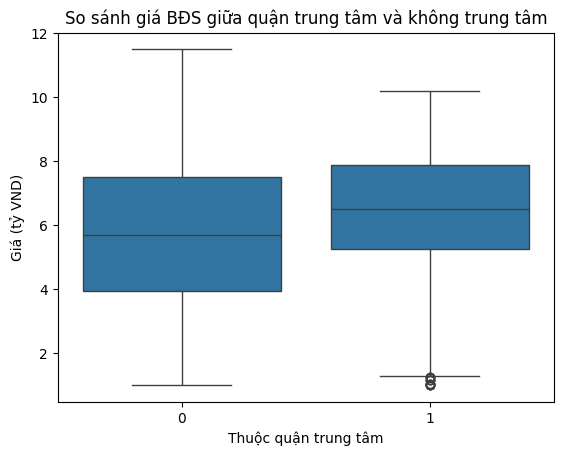

In [ ]:
sns.boxplot(data=house_data, x='is_center_district', y='Price')
plt.title('So sánh giá BĐS giữa quận trung tâm và không trung tâm')
plt.xlabel('Thuộc quận trung tâm')
plt.ylabel('Giá (tỷ VND)')
plt.show()

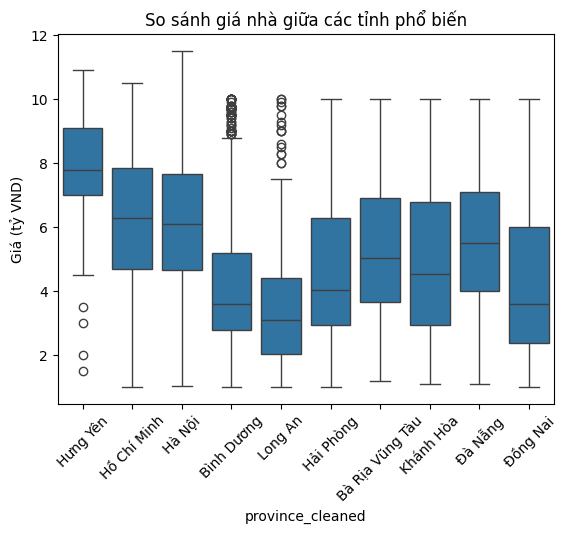

In [ ]:
top_provinces = house_data['province_cleaned'].value_counts().nlargest(10).index
sns.boxplot(data=house_data[house_data['province_cleaned'].isin(top_provinces)],
            x='province_cleaned', y='Price')
plt.xticks(rotation=45)
plt.title('So sánh giá nhà giữa các tỉnh phổ biến')
plt.ylabel('Giá (tỷ VND)')
plt.show()

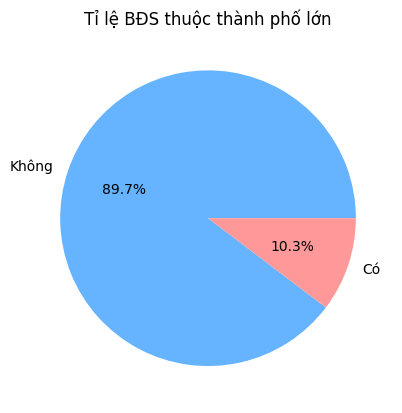

In [ ]:
house_data['is_major_city'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Không', 'Có'], colors=['#66b3ff','#ff9999'])
plt.title('Tỉ lệ BĐS thuộc thành phố lớn')
plt.ylabel('')
plt.show()

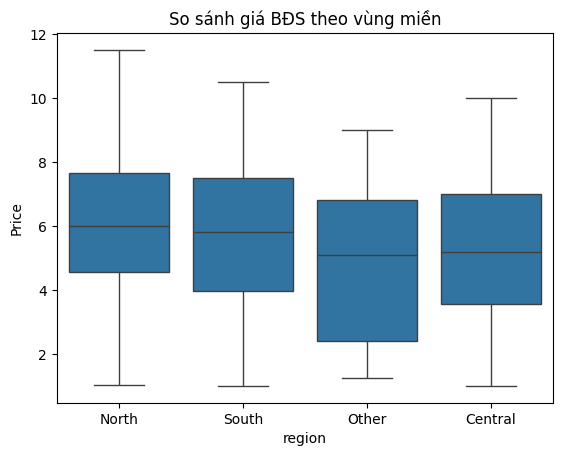

In [ ]:
sns.boxplot(data=house_data, x='region', y='Price')
plt.title('So sánh giá BĐS theo vùng miền')
plt.show()

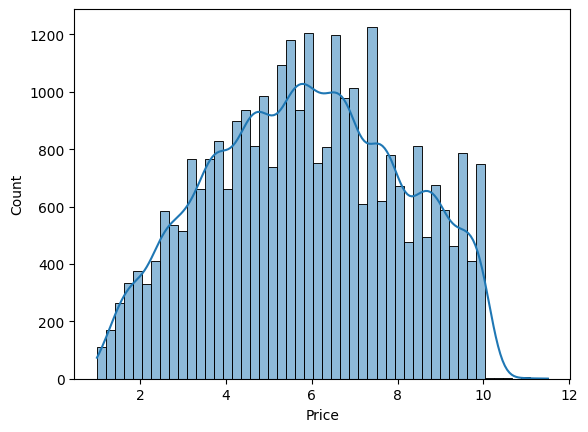

In [ ]:
sns.histplot(house_data['Price'], kde=True)
plt.savefig('price_distribution.png', dpi=300, bbox_inches='tight')

Trong đây thấy được trường dữ liệu về giá cả không bị hẹp hay bị dồn về một bên mà trải đều nên không cần phải thay đổi.

## Numerical Features (Các Trường số học)

In [ ]:
house_data['Floors'].fillna(round(house_data.groupby('province_cleaned')['Floors'].transform('mean'), 0), inplace=True)
house_data['Floors'].fillna(1, inplace=True)
house_data['Bedrooms'].fillna(round(house_data.groupby('province_cleaned')['Bedrooms'].transform('mean'), 0), inplace=True)
house_data['Bedrooms'].fillna(1, inplace=True)
house_data['Bathrooms'].fillna(round(house_data.groupby('province_cleaned')['Bathrooms'].transform('mean'), 0), inplace=True)
house_data['Bathrooms'].fillna(1, inplace=True)


house_data['Frontage'].fillna(round(house_data.groupby('province_cleaned')['Frontage'].transform('mean'), 2), inplace=True)
house_data['Frontage'].fillna(1, inplace=True)
house_data['Access Road'].fillna(round(house_data.groupby('province_cleaned')['Access Road'].transform('mean'), 2), inplace=True)
house_data['Access Road'].fillna(1, inplace=True)
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Address             30229 non-null  object 
 1   Area                30229 non-null  float64
 2   Frontage            30229 non-null  float64
 3   Access Road         30229 non-null  float64
 4   House direction     8990 non-null   object 
 5   Balcony direction   5246 non-null   object 
 6   Floors              30229 non-null  float64
 7   Bedrooms            30229 non-null  float64
 8   Bathrooms           30229 non-null  float64
 9   Legal status        25723 non-null  object 
 10  Furniture state     16110 non-null  object 
 11  Price               30229 non-null  float64
 12  province_cleaned    30229 non-null  object 
 13  is_major_city       30229 non-null  int64  
 14  major_city_name     30229 non-null  object 
 15  is_center_district  30229 non-null  int64  
 16  regi

Vẽ biểu đồ để thấy được sự phân bổ của các trường số học so với trường giá để xem sự phân bổ của các giá trị

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Address             30229 non-null  object 
 1   Area                30229 non-null  float64
 2   Frontage            30229 non-null  float64
 3   Access Road         30229 non-null  float64
 4   House direction     8990 non-null   object 
 5   Balcony direction   5246 non-null   object 
 6   Floors              30229 non-null  float64
 7   Bedrooms            30229 non-null  float64
 8   Bathrooms           30229 non-null  float64
 9   Legal status        25723 non-null  object 
 10  Furniture state     16110 non-null  object 
 11  Price               30229 non-null  float64
 12  province_cleaned    30229 non-null  object 
 13  is_major_city       30229 non-null  int64  
 14  major_city_name     30229 non-null  object 
 15  is_center_district  30229 non-null  int64  
 16  regi

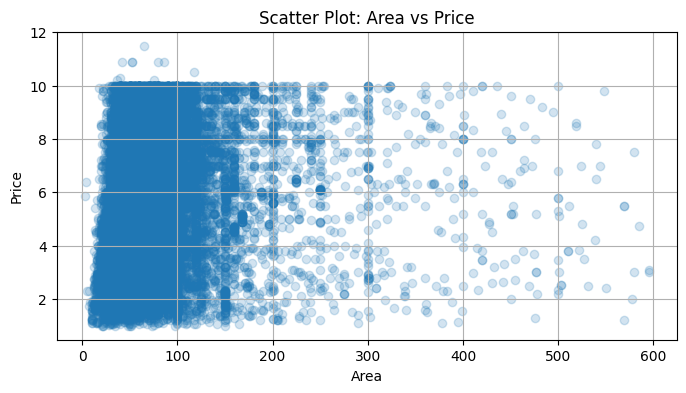

<Figure size 640x480 with 0 Axes>

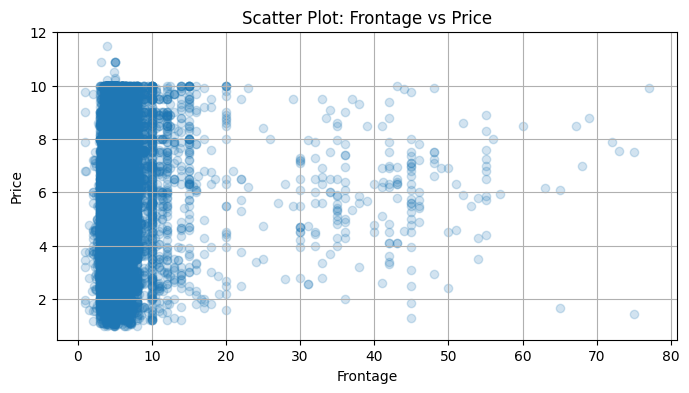

<Figure size 640x480 with 0 Axes>

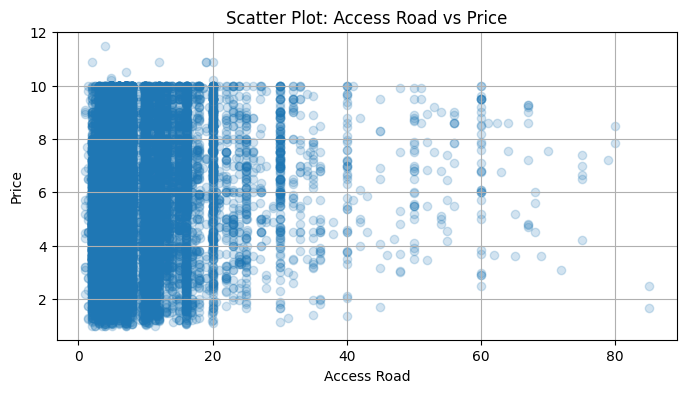

<Figure size 640x480 with 0 Axes>

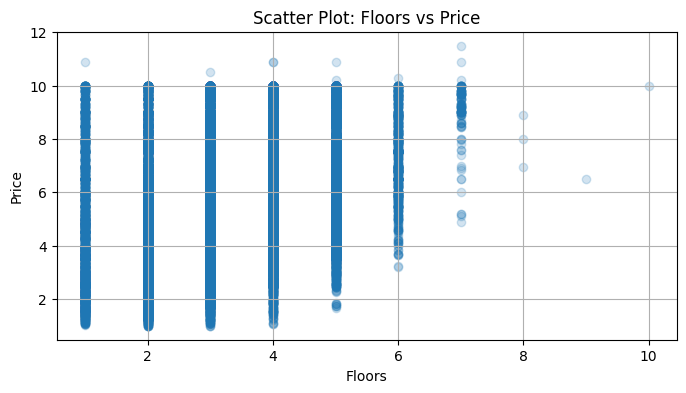

<Figure size 640x480 with 0 Axes>

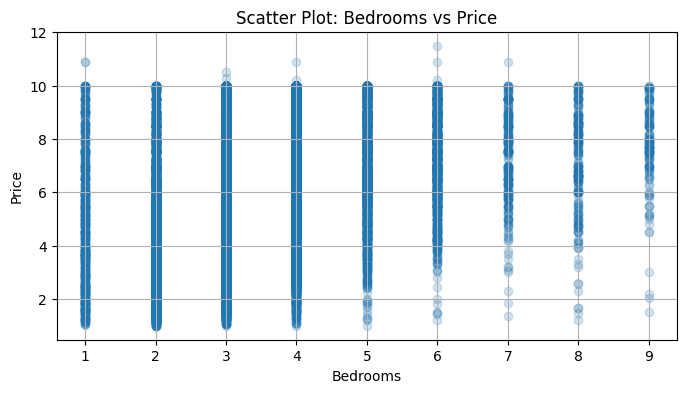

<Figure size 640x480 with 0 Axes>

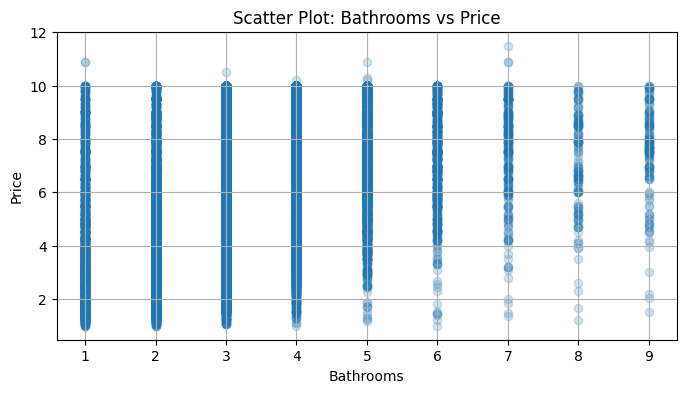

<Figure size 640x480 with 0 Axes>

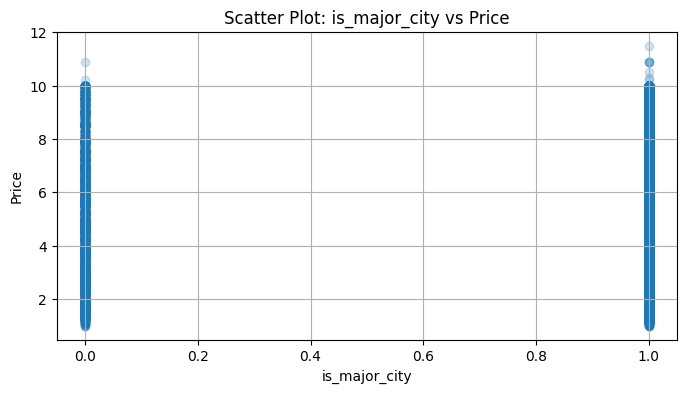

<Figure size 640x480 with 0 Axes>

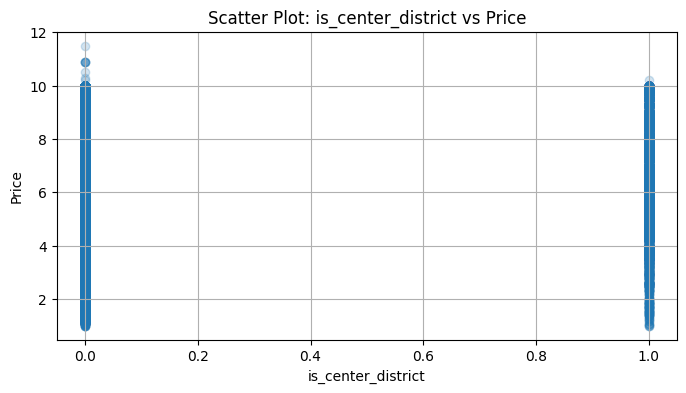

<Figure size 640x480 with 0 Axes>

In [ ]:
# List of numerical features to plot against 'Price'
numerical_features = house_data.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('Price', errors='ignore')

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    plt.scatter(house_data[feature], house_data['Price'], alpha=0.2)
    plt.title(f'Scatter Plot: {feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()
    plt.savefig(f'Scatter Plot: {feature} vs Price.png', dpi=300, bbox_inches='tight')

Chúng ta có thể thấy một số giá trị Outlier, các giá trị này sẽ gây ảnh hướng đến quá trình huấn luyện của mô hình do chúng sẽ gây lệch giá trị (bias) hay là sẽ gây overfitting khiến mô mất đi độ chuẩn xác.

# Sau đây là bước loại bỏ các Outlier có trong dữ liệu:
# Tóm tắt
📌 Mục đích: Loại bỏ outlier bằng phương pháp IQR (Interquartile Range).
📌 Cách thực hiện:

1. Xác định các cột số.
2. Tính Q1, Q3, IQR của từng cột.
3. Loại bỏ dữ liệu nằm ngoài phạm vi [Q1 - 1.5*IQR, Q3 + 1.5*IQR].
4. Reset lại index sau khi lọc.
    
    📌 Lợi ích: Giúp mô hình tránh bị ảnh hưởng bởi các giá trị ngoại lai quá lớn hoặc quá nhỏ.

1. Hiểu về Tứ phân vị (Quartiles) và IQR
Tứ phân vị (Quartiles)
Dữ liệu được chia thành 4 phần bằng nhau, được xác định bởi các điểm tứ phân vị:

Q1 (Quartile 1 - Phân vị thứ 25%): Giá trị mà 25% dữ liệu nhỏ hơn hoặc bằng.
Q2 (Quartile 2 - Phân vị thứ 50%): Trung vị (Median) – chia dữ liệu thành hai nửa.
Q3 (Quartile 3 - Phân vị thứ 75%): Giá trị mà 75% dữ liệu nhỏ hơn hoặc bằng.
Ví dụ: Dữ liệu sắp xếp tăng dần
👉 [2, 4, 6, 8, 10, 12, 14, 16, 18]

Q1 = 6 (25% đầu tiên)
Q2 = 10 (50%)
Q3 = 14 (75%)
IQR = Q3 - Q1 = 14 - 6 = 8

In [ ]:
print(f"Before filtering: {house_data.shape}")

numerical_cols = house_data.select_dtypes(include=[np.number]).columns
def remove_outlier_IQR(df, series):
    Q1=df[series].quantile(0.25)
    Q3=df[series].quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df[series]<(Q1-1.5*IQR)) | (df[series]>(Q3+1.5*IQR)))]
    return df_final

for column in numerical_cols:
  if column not in ['is_major_city',	'is_center_district']:
    house_data = remove_outlier_IQR(house_data, column)

house_data.reset_index(inplace = True)
print(f"After filtering: {house_data.shape}")

Before filtering: (30229, 17)
After filtering: (20069, 18)


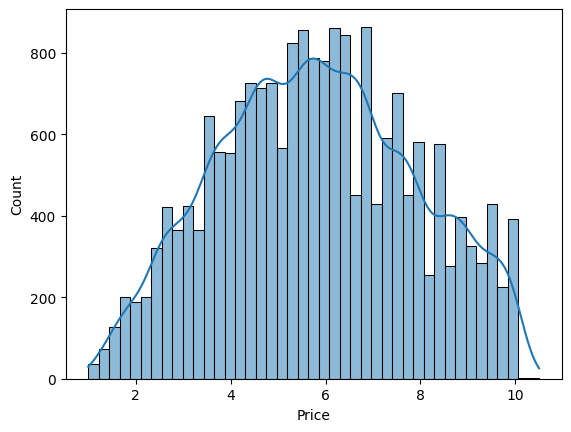

In [ ]:
sns.histplot(house_data['Price'], kde=True)
plt.savefig('price_distribution.png', dpi=300, bbox_inches='tight')

In [ ]:
house_data[numerical_cols].corr()

Area  Frontage  Access Road    Floors  Bedrooms  Bathrooms     Price  is_major_city  is_center_district
Area                1.000000  0.269172     0.381841 -0.411314  0.031548  -0.106727  0.234604      -0.188898           -0.241233
Frontage            0.269172  1.000000     0.197880 -0.052079  0.049133   0.024420  0.068365      -0.047230           -0.047926
Access Road         0.381841  0.197880     1.000000 -0.265548 -0.017062  -0.067685  0.144281      -0.066266           -0.160698
Floors             -0.411314 -0.052079    -0.265548  1.000000  0.457056   0.621932  0.273271       0.148408            0.208724
Bedrooms            0.031548  0.049133    -0.017062  0.457056  1.000000   0.625269  0.334422       0.041667            0.054107
Bathrooms          -0.106727  0.024420    -0.067685  0.621932  0.625269   1.000000  0.359347       0.116346            0.107868
Price               0.234604  0.068365     0.144281  0.273271  0.334422   0.359347  1.000000       0.152456            0.146631
is_major_city      -0.188898 -0.047230    -0.066266  0.148408  0.041667   0.116346  0.152456       1.000000            0.076917
is_center_district -0.241233 -0.047926    -0.160698  0.208724  0.054107   0.107868  0.146631       0.076917            1.000000

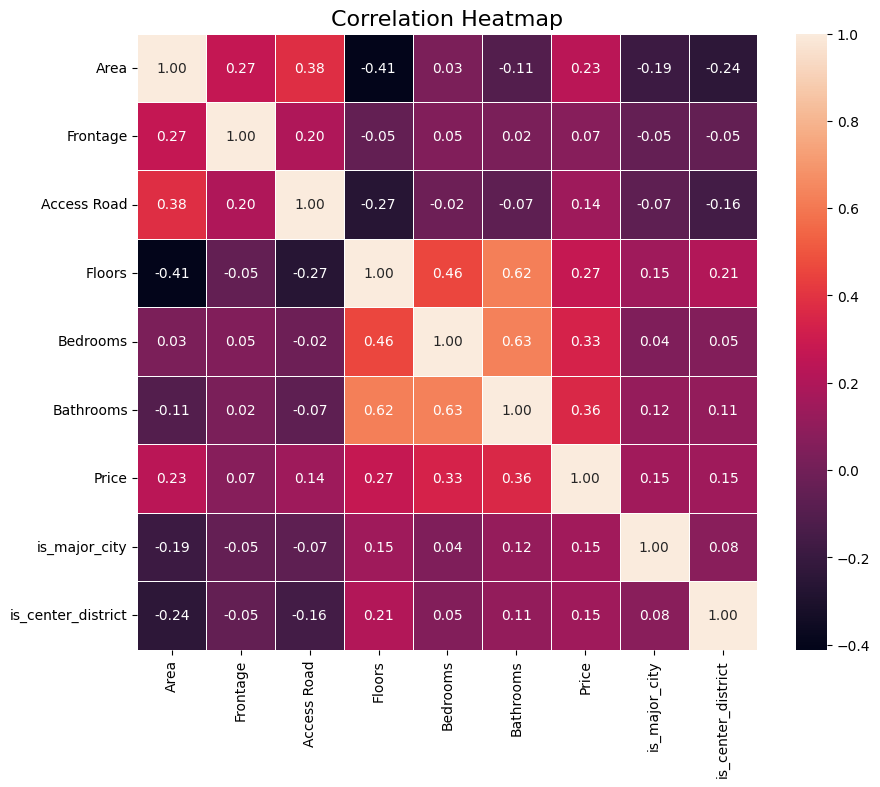

<Figure size 640x480 with 0 Axes>

In [ ]:
corr_matrix = house_data[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cbar=True)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()
plt.savefig('Correlation_Heatmap.png', dpi=300, bbox_inches='tight')

Floors, Bedrooms và Bathrooms có mối tương quan cao nhất với biến mục tiêu cũng như với nhau, điều này sẽ hữu ích cho quá trình tạo đặc trưng (Feature Engineering) sau này. Điều khiến tôi ngạc nhiên là mối tương quan giữa giá nhà và diện tích (thường là yếu tố quyết định giá nhà). Tuy nhiên, vì chúng ta chỉ đang xem xét mối tương quan tuyến tính, nên có thể chúng ta đã bỏ lỡ một số kiểu quan hệ khác. Do đó, chúng ta có thể sử dụng Mutual Information để kiểm tra thêm.

In [ ]:
house_data.drop('House direction', inplace = True, axis = 1)
house_data.drop('Balcony direction', inplace = True, axis = 1)

In [ ]:
house_data['Legal status'].fillna('None', inplace=True)
house_data['Furniture state'].fillna('None', inplace=True)

In [ ]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20069 entries, 0 to 20068
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               20069 non-null  int64  
 1   Address             20069 non-null  object 
 2   Area                20069 non-null  float64
 3   Frontage            20069 non-null  float64
 4   Access Road         20069 non-null  float64
 5   Floors              20069 non-null  float64
 6   Bedrooms            20069 non-null  float64
 7   Bathrooms           20069 non-null  float64
 8   Legal status        20069 non-null  object 
 9   Furniture state     20069 non-null  object 
 10  Price               20069 non-null  float64
 11  province_cleaned    20069 non-null  object 
 12  is_major_city       20069 non-null  int64  
 13  major_city_name     20069 non-null  object 
 14  is_center_district  20069 non-null  int64  
 15  region              20069 non-null  object 
dtypes: f

In [ ]:
# I only want to check Mutual Information of only numerical features
X = house_data[numerical_cols]
y = X.pop('Price')

print(make_mi_scores(X, y))

Area                  0.227951
Floors                0.103545
Bathrooms             0.102497
Bedrooms              0.089181
Frontage              0.082566
Access Road           0.079854
is_center_district    0.027115
is_major_city         0.017109
Name: MI Scores, dtype: float64


Area có nhiều MI nhất ở đây. Dù sao thì, bước này chỉ để minh họa. Vì chúng ta chỉ có một vài đặc trưng, nên tôi nghĩ tốt nhất là giữ lại tất cả cho mô hình sau này. Nếu có nhiều đặc trưng, chúng ta có thể kiểm tra mối tương quan và Thông tin Tương hỗ (Mutual Information) của chúng để xác định đặc trưng nào đáng giữ lại và đặc trưng nào không, nhằm tiết kiệm tài nguyên và thời gian.

mã MI không phải vô ích, bây giờ tôi muốn tạo các PCA và kiểm tra MI của chúng để xem nên giữ lại những gì.

Như phân tích các thông số về PCA và MI score đề cao ở các trường Floors, Bedrooms, Bathrooms, and Area vì vậy chúng có sự tương quan với nhau.

# Tạo Feature có các trường Floors, Bedrooms, Bathrooms, Area, is_major_city	và is_center_district

In [ ]:
#  tạo ra các đặc trưng (features) mới dựa trên loadings của PCA.
X['Total Room'] = X['Bedrooms'] + X['Bathrooms']
X['Total Room + Floor'] = X['Total Room'] + X['Floors']
X['Bedrooms * Area'] = X['Bedrooms'] * X['Area']
X['Bathrooms * Area'] = X['Bathrooms'] * X['Area']
X['Area_Floors'] = X['Area'] * X['Floors']
X['High_Values Real Estate'] = X['is_major_city'] * X["is_center_district"]

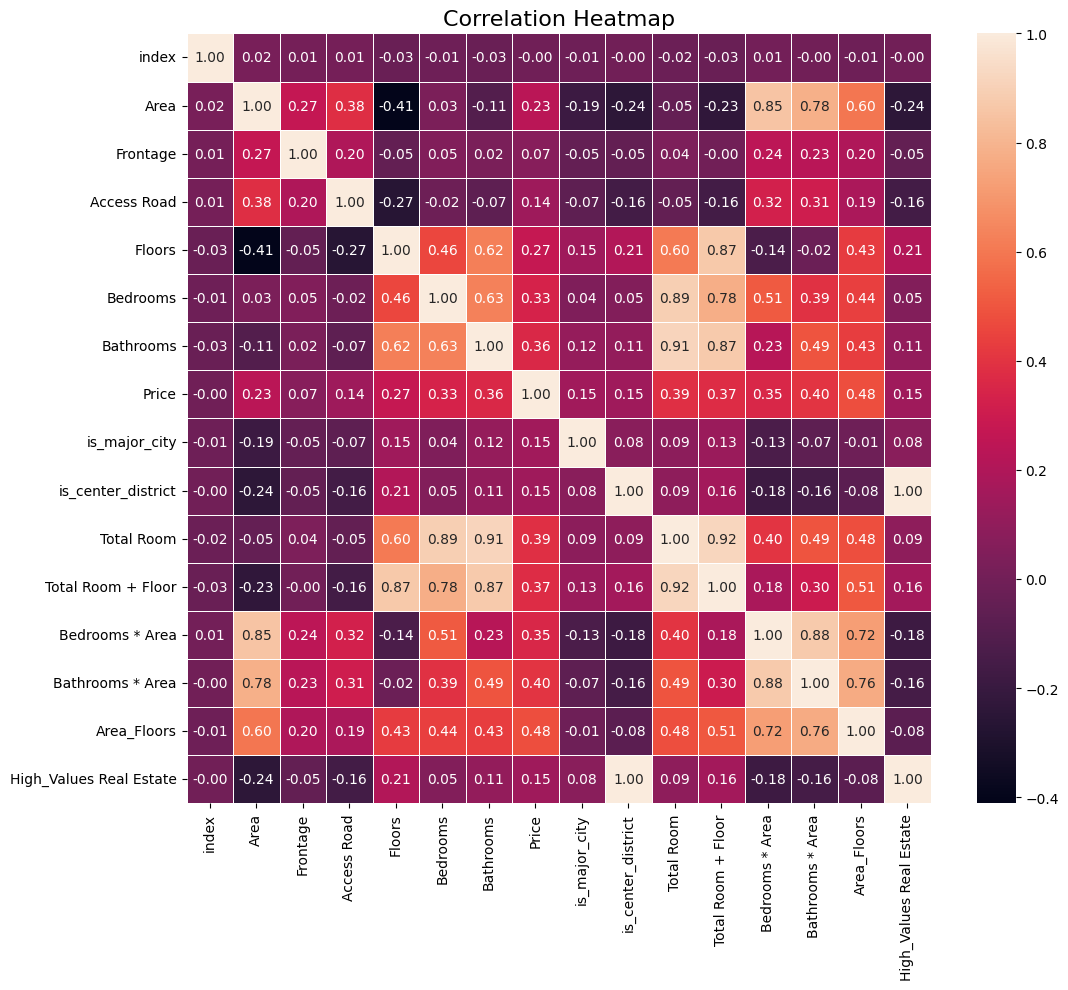

<Figure size 640x480 with 0 Axes>

In [ ]:
# vẽ đồ thị biểu hiện sự tương quan của các giá trị với nhau
house_data = house_data.assign(**X)
numerical_features = house_data.select_dtypes(include=['number']).columns
corr_matrix = house_data[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cbar=True)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()
plt.savefig('CorrelationHeatmap_with_PC.png', dpi=300, bbox_inches='tight')

## Categorical Features

In [ ]:
# Check null values
house_data.isnull().sum()

index                      0
Address                    0
Area                       0
Frontage                   0
Access Road                0
Floors                     0
Bedrooms                   0
Bathrooms                  0
Legal status               0
Furniture state            0
Price                      0
province_cleaned           0
is_major_city              0
major_city_name            0
is_center_district         0
region                     0
Total Room                 0
Total Room + Floor         0
Bedrooms * Area            0
Bathrooms * Area           0
Area_Floors                0
High_Values Real Estate    0
dtype: int64

Sau khi phân tích ta có thể thấy rằng các trường liên quan đến Hướng của nhà, ban công không đóng góp quá nhiều vào trong quá trình đưa ra giá nhà, ngoài ra hai trường này còn bị bỏ trống đến gần 2/3 số dữ liệu.

Trong Trường Address (địa chỉ) có 2 yếu tố mà chúng ta có thể dùng:
1. Thành phố nơi mà căn nhà nằm ở
2. Nếu căn nhà có nằm trong khi vực dự án hay không.

Từ hai điều này chúng ta có thể giúp cải thiện kết quả đầu ra của mô hình.

In [ ]:
# house_data['Province'] = house_data['Address'].str.split(", ").str[-1].str.replace(".", "")
house_data['Project'] = house_data['Address'].str.lower().str.contains('dự án').map({True: 1, False: 0})

# house_data.head()

In [ ]:
# Sẽ loại bỏ các khu vực xuất hiện ít hơn 5 lần trong toàn bộ dataset để hạn chế độ nhiễu (noise) trong quá trình huấn luyện
unique_provinces = house_data['province_cleaned'].value_counts()
unique_provinces = unique_provinces[unique_provinces < 5].index
house_data = house_data[~house_data['province_cleaned'].isin(unique_provinces)]

house_data.drop('Address', axis = 1, inplace = True)

Kiểm tra giả thuyết về sự tương quan giữa giá cả và địa chỉ.

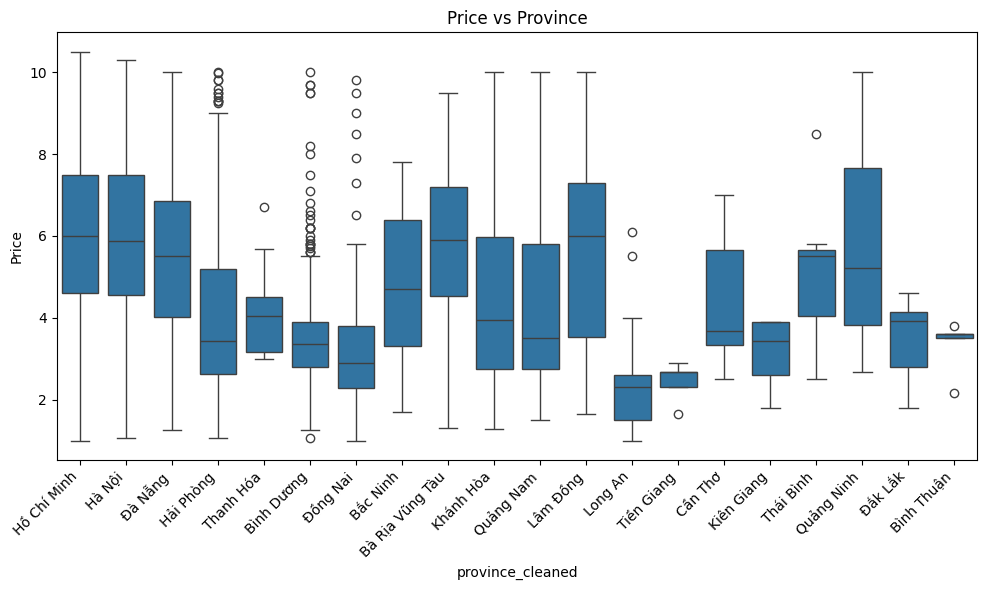

In [ ]:
# Tạo biểu để hiện thị sự tương quan của Price và Province
plt.figure(figsize=(10, 6))
sns.boxplot(x='province_cleaned', y='Price', data=house_data)
plt.title('Price vs Province')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

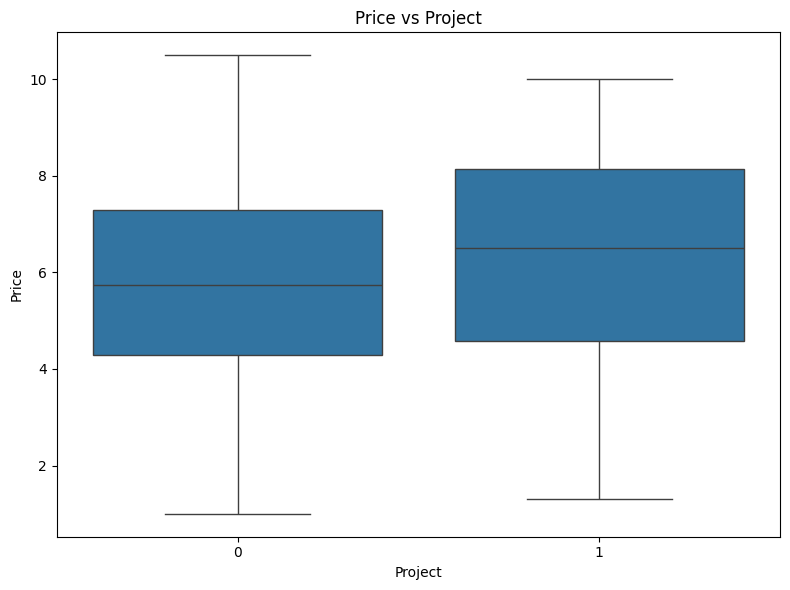

<Figure size 640x480 with 0 Axes>

In [ ]:
# Làm tương tự cho cột Dự án (Project) và Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='Project', y='Price', data=house_data)
plt.title('Price vs Project')

plt.tight_layout()
plt.show()
plt.savefig('Project_Price.png', dpi=300, bbox_inches='tight')

# Kết luận:
sau khi đã trực quan hóa dữ liệu ta có thể thấy rằng, thành phố mà căn nhà được đặt tại có sức ảnh hưởng đến giá cả của căn nhà, trong khi đó việc căn nhà có thuộc dự án hay không không có quá nhiều ảnh hưởng để quyết định,

Tiếp theo sẽ tính toán một số đặc trưng mới và loại bỏ các đặc trưng không cần thiết ra khỏi Dataset

1. Tạo thêm một trường có tên "Price per square" nhằm giúp chúng ta có thể biết được giá tiền trên 1 mét vuông của các căn nhà của dataset

1.1 Tạo cột mới Price per square bằng cách lấy giá nhà (Price) chia cho diện tích (Area)

1.2 Lọc bỏ các bất động sản có giá quá thấp (Giữ lại các bất động sản có giá trên mỗi mét vuông nhỏ hơn hoặc bằng 0.25) lý do: để hạn chế các outlier và các căn nhà bị để sai giá.

1.3 Tạo đặc trưng tổ hợp từ tỉnh thành và dự án tạo một đặc trưng mới Province_Project bằng cách kết hợp Province và Project, giúp phân nhóm dữ liệu theo từng dự án trong mỗi tỉnh

1.4 Tính giá trung bình trên mỗi mét vuông theo nhóm Province_Project nhóm dữ liệu theo Province_Project, sau đó tính giá trung bình trên mỗi mét vuông của từng nhóm và gán vào cột AveragePricePerSquare

1.5 Loại bỏ các cột không cần thiết:
 + Xóa cột Price per square (đã được thay thế bởi AveragePricePerSquare).
 + Xóa cột Province và Project vì đã kết hợp thành Province_Project.

In [ ]:
house_data['Price per square'] = house_data['Price'] / house_data['Area']
house_data = house_data[house_data['Price per square'] <= 0.25]

house_data['Province_Project'] = house_data['province_cleaned'] + '_' + house_data['Project'].astype(str)

house_data["AveragePricePerSquare"] = (
    house_data.groupby("Province_Project")
    ["Price per square"]
    .transform("mean")
)
print(house_data.columns)
house_data.drop('Price per square', axis = 1, inplace = True)
house_data.drop('province_cleaned', axis = 1, inplace = True)
house_data.drop('Project', axis = 1, inplace = True)

Index(['index', 'Area', 'Frontage', 'Access Road', 'Floors', 'Bedrooms', 'Bathrooms', 'Legal status', 'Furniture state', 'Price', 'province_cleaned', 'is_major_city', 'major_city_name', 'is_center_district', 'region', 'Total Room', 'Total Room + Floor', 'Bedrooms * Area', 'Bathrooms * Area', 'Area_Floors', 'High_Values Real Estate', 'Project', 'Price per square', 'Province_Project', 'AveragePricePerSquare'], dtype='object')


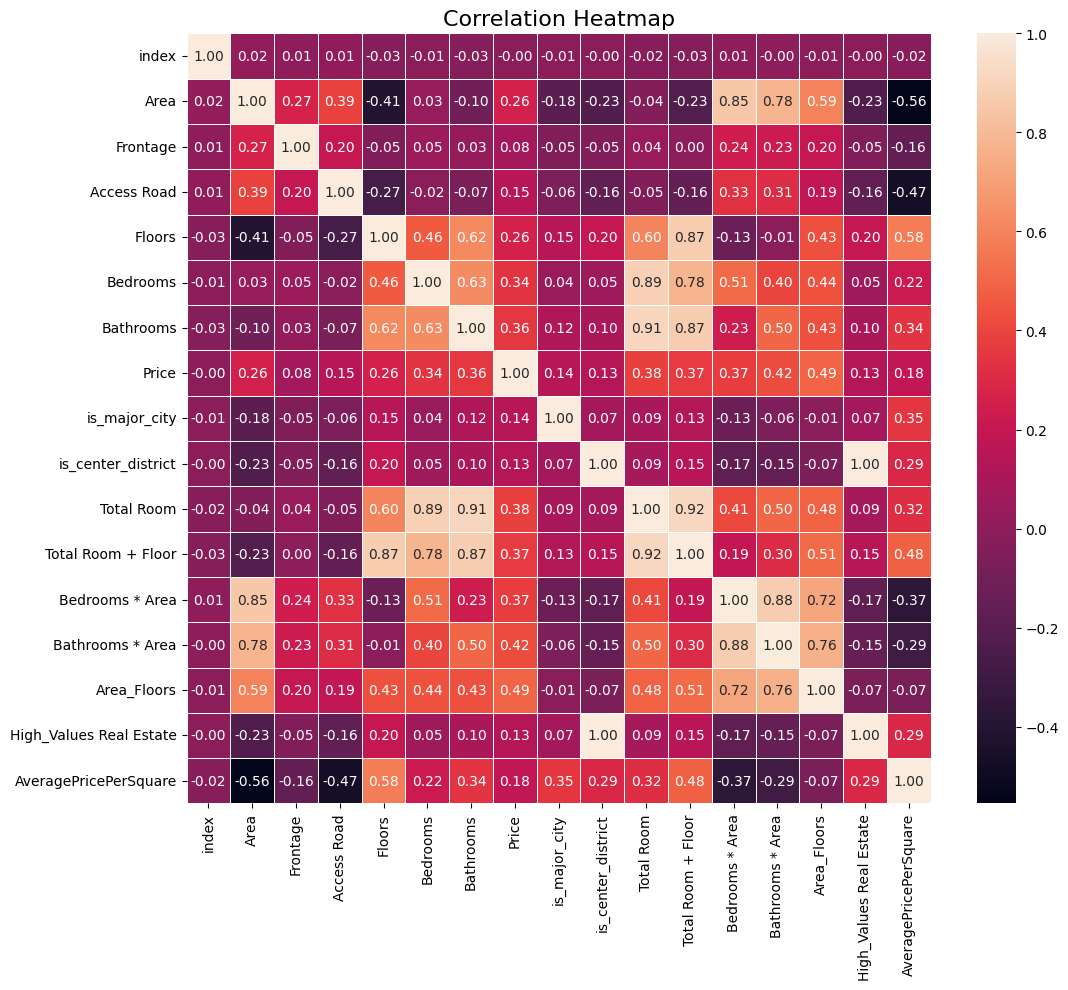

<Figure size 640x480 with 0 Axes>

In [ ]:
# vẽ đồ thị biểu hiện sự tương quan của các giá trị với nhau
house_data = house_data.assign(**X)
numerical_features = house_data.select_dtypes(include=['number']).columns
corr_matrix = house_data[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cbar=True)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()
plt.savefig('CorrelationHeatmap_with_PC.png', dpi=300, bbox_inches='tight')

In [ ]:
house_data

index  Area  Frontage  Access Road  Floors  Bedrooms  Bathrooms      Legal status Furniture state  Price  is_major_city major_city_name  is_center_district region  Total Room  Total Room + Floor  Bedrooms * Area  Bathrooms * Area  Area_Floors  High_Values Real Estate Province_Project  AveragePricePerSquare
0          3  54.0      4.94         3.50     2.0       2.0        3.0  Have certificate            Full   5.35              1     Hồ Chí Minh                   0  South         5.0                 7.0            108.0             162.0        108.0                        0    Hồ Chí Minh_0               0.108843
1          4  92.0      4.94         7.06     2.0       4.0        4.0  Have certificate            Full   6.90              1     Hồ Chí Minh                   0  South         8.0                10.0            368.0             368.0        184.0                        0    Hồ Chí Minh_0               0.108843
2         15  30.0      4.94         7.06     2.0       2.0        2.0  Have certificate            Full   3.79              1     Hồ Chí Minh                   0  South         4.0                 6.0             60.0              60.0         60.0                        0    Hồ Chí Minh_0               0.108843
3         19  46.0      4.60         6.00     4.0       4.0        5.0  Have certificate            Full   7.99              1     Hồ Chí Minh                   0  South         9.0                13.0            184.0             230.0        184.0                        0    Hồ Chí Minh_0               0.108843
4         26  55.0      5.00         7.06     2.0       4.0        3.0  Have certificate           Basic   3.25              1     Hồ Chí Minh                   0  South         7.0                 9.0            220.0             165.0        110.0                        0    Hồ Chí Minh_0               0.108843
...      ...   ...       ...          ...     ...       ...        ...               ...             ...    ...            ...             ...                 ...    ...         ...                 ...              ...               ...          ...                      ...              ...                    ...
20064  30221  31.0      3.00         3.00     3.0       4.0        3.0              None           Basic   3.98              1     Hồ Chí Minh                   0  South         7.0                10.0            124.0              93.0         93.0                        0    Hồ Chí Minh_0               0.108843
20065  30222  24.0      3.00         3.00     3.0       2.0        3.0  Have certificate           Basic   3.50              1     Hồ Chí Minh                   0  South         5.0                 8.0             48.0              72.0         72.0                        0    Hồ Chí Minh_0               0.108843
20066  30225  30.0      5.08         4.85     5.0       3.0        3.0  Have certificate            None   4.70              1          Hà Nội                   0  North         6.0                11.0             90.0              90.0        150.0                        0         Hà Nội_0               0.146131
20067  30227  96.0      4.94         8.00     4.0       3.0        3.0              None            None   9.50              1     Hồ Chí Minh                   0  South         6.0                10.0            288.0             288.0        384.0                        0    Hồ Chí Minh_0               0.108843
20068  30228  35.0      5.08         4.85     5.0       3.0        4.0  Have certificate           Basic   3.15              1          Hà Nội                   0  North         7.0                12.0            105.0             140.0        175.0                        0         Hà Nội_0               0.146131

[19780 rows x 22 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

def prepare_training_data(df):
    # Mục tiêu
    y = df['Price']

    # Các cột không dùng để huấn luyện
    drop_cols = ['index', 'Price', 'major_city_name', 'Province_Project']
    df_model = df.drop(columns=drop_cols)

    # Xác định cột dạng số và dạng phân loại
    numerical_cols = df_model.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df_model.select_dtypes(include=['object']).columns.tolist()

    # Tiền xử lý
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ]
    )

    # Fit để lấy tên feature
    preprocessor.fit(df_model)
    transformed_feature_names = preprocessor.get_feature_names_out()
    joblib.dump(list(transformed_feature_names), '/content/drive/MyDrive/DoAnTotNghiep/final_model/final_feature_list.pkl')

    # Áp dụng preprocessor
    X_processed = preprocessor.transform(df_model)

    # Chia 80% train+val và 20% test
    X_temp, X_test, y_temp, y_test = train_test_split(X_processed, y, test_size=0.20, random_state=42)

    # Tiếp tục chia 75% train và 25% validation trong tập tạm (tức 60% train, 20% val)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.0625, random_state=42)
    # 0.0625 = 5 / 80 để tạo ra đúng 5% tổng (vì đang chia từ 80%)

    # Lưu preprocessor
    joblib.dump(preprocessor, '/content/drive/MyDrive/DoAnTotNghiep/final_model/preprocessor.pkl')

    return X_train, X_val, X_test, y_train, y_val, y_test, preprocessor

Chia tập dữ liệu thành tập huấn luyện (75%) và tập kiểm tra (20%) và tập đánh giá (5%).


Xác định danh sách giá trị alpha cần thử nghiệm.

Huấn luyện mô hình Ridge với GridSearchCV để tìm giá trị alpha tối ưu.

Huấn luyện mô hình Lasso với GridSearchCV để tìm giá trị alpha tối ưu.

Dự đoán trên tập kiểm tra bằng mô hình Ridge và Lasso tốt nhất.

Tính toán RMSE để đánh giá hiệu suất mô hình.

In kết quả gồm giá trị alpha tối ưu và RMSE cho cả hai mô hình.


In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test, preprocessor = prepare_training_data(house_data)

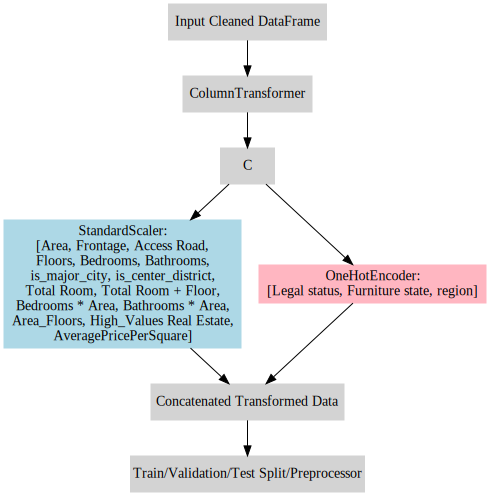

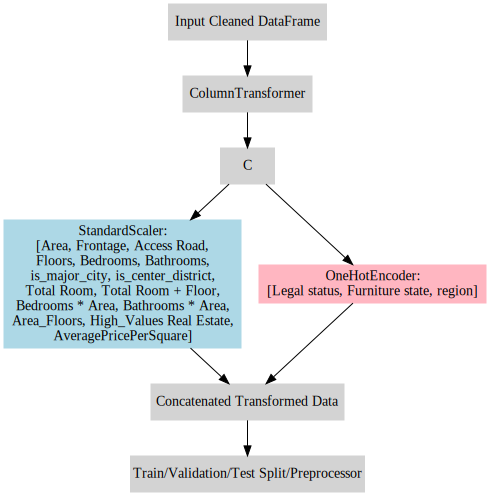

In [ ]:
from graphviz import Digraph
dot = Digraph()

dot = Digraph(format='png')
dot.attr(rankdir='TB', size='8,10')
dot.attr('node', shape='box', style='filled', color='lightgrey')

dot.node('A', 'Input Cleaned DataFrame')
dot.node('B', 'Drop columns:\n[index, Price, major_city_name,\nProvince_Project]')
dot.node('B', 'ColumnTransformer')

dot.node('D1', '''StandardScaler:
  [Area, Frontage, Access Road,
  Floors, Bedrooms, Bathrooms,
  is_major_city, is_center_district,
  Total Room, Total Room + Floor,
  Bedrooms * Area, Bathrooms * Area,
  Area_Floors, High_Values Real Estate,
  AveragePricePerSquare]''', shape='box', color='lightblue')

dot.node('D2', '''OneHotEncoder:
  [Legal status, Furniture state, region]''', shape='box', color='lightpink')

dot.node('E', 'Concatenated Transformed Data')
dot.node('F', 'Train/Validation/Test Split/Preprocessor')

# Kết nối
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('C', 'D1')
dot.edge('C', 'D2')
dot.edge('D1', 'E')
dot.edge('D2', 'E')
dot.edge('E', 'F')

# Xuất file ảnh PNG
dot.render('pipeline_diagram', format='png', cleanup=True)
display(dot)

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Area', 'Frontage', 'Access Road', 'Floors',
                                  'Bedrooms', 'Bathrooms', 'is_major_city',
                                  'is_center_district', 'Total Room',
                                  'Total Room + Floor', 'Bedrooms * Area',
                                  'Bathrooms * Area', 'Area_Floors',
                                  'High_Values Real Estate',
                                  'AveragePricePerSquare']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Legal status', 'Furniture state',
                                  'region'])])

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Area', 'Frontage', 'Access Road', 'Floors',
                                  'Bedrooms', 'Bathrooms', 'is_major_city',
                                  'is_center_district', 'Total Room',
                                  'Total Room + Floor', 'Bedrooms * Area',
                                  'Bathrooms * Area', 'Area_Floors',
                                  'High_Values Real Estate',
                                  'AveragePricePerSquare']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Legal status', 'Furniture state',
                                  'region'])])

In [ ]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Huấn luyện hoặc tải lại Ridge & Lasso
ridge_model_path = os.path.join(save_dir, "ridge_model.pkl")
lasso_model_path = os.path.join(save_dir, "lasso_model.pkl")

# if os.path.exists(ridge_model_path) and os.path.exists(lasso_model_path):
#     ridge_best = joblib.load(ridge_model_path)
#     lasso_best = joblib.load(lasso_model_path)
# else:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
ridge_best = ridge_cv.best_estimator_
joblib.dump(ridge_best, ridge_model_path)

lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
lasso_best = lasso_cv.best_estimator_
joblib.dump(lasso_best, lasso_model_path)

# Make predictions on the testing set using the best models
ridge_pred = ridge_best.predict(X_test)
lasso_pred = lasso_best.predict(X_test)

# Calculate RMSE for Ridge and Lasso
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

# Output the RMSE values and best alpha values
print(f"Ridge Regression - Best Alpha: {ridge_cv.best_params_['alpha']}, RMSE: {ridge_rmse:.2f}")
print(f"Lasso Regression - Best Alpha: {lasso_cv.best_params_['alpha']}, RMSE: {lasso_rmse:.2f}")

Ridge Regression - Best Alpha: 10, RMSE: 1.59
Lasso Regression - Best Alpha: 0.01, RMSE: 1.60
Ridge Regression - Best Alpha: 10, RMSE: 1.59
Lasso Regression - Best Alpha: 0.01, RMSE: 1.60


In [ ]:
# Kiểm tra và tải mô hình
if os.path.exists(ridge_model_path) and os.path.exists(lasso_model_path):
    ridge_best = joblib.load(ridge_model_path)
    lasso_best = joblib.load(lasso_model_path)

    # Dự đoán trên tập test
    ridge_pred = ridge_best.predict(X_test)
    lasso_pred = lasso_best.predict(X_test)

    # Tính MAPE
    ridge_mape = mean_absolute_percentage_error(y_test, ridge_pred)
    lasso_mape = mean_absolute_percentage_error(y_test, lasso_pred)

    # Tính RMSE
    ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
    lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

    # In kết quả
    print(f"Ridge Regression - MAPE: {ridge_mape:.2f}%, RMSE: {ridge_rmse:.2f}")
    print(f"Lasso Regression - MAPE: {lasso_mape:.2f}%, RMSE: {lasso_rmse:.2f}")
else:
    print("Không tìm thấy mô hình Ridge hoặc Lasso.")

Ridge Regression - MAPE: 0.26%, RMSE: 1.59
Lasso Regression - MAPE: 0.27%, RMSE: 1.60
Ridge Regression - MAPE: 0.26%, RMSE: 1.59
Lasso Regression - MAPE: 0.27%, RMSE: 1.60


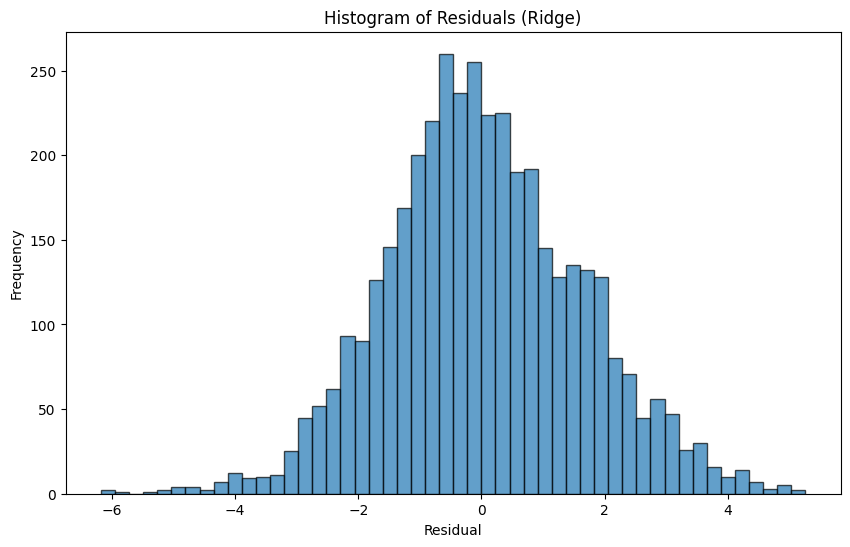

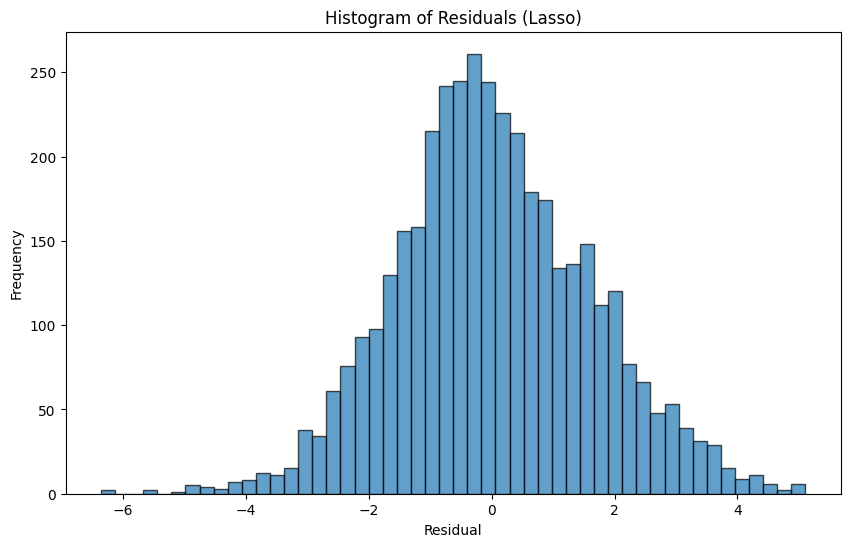

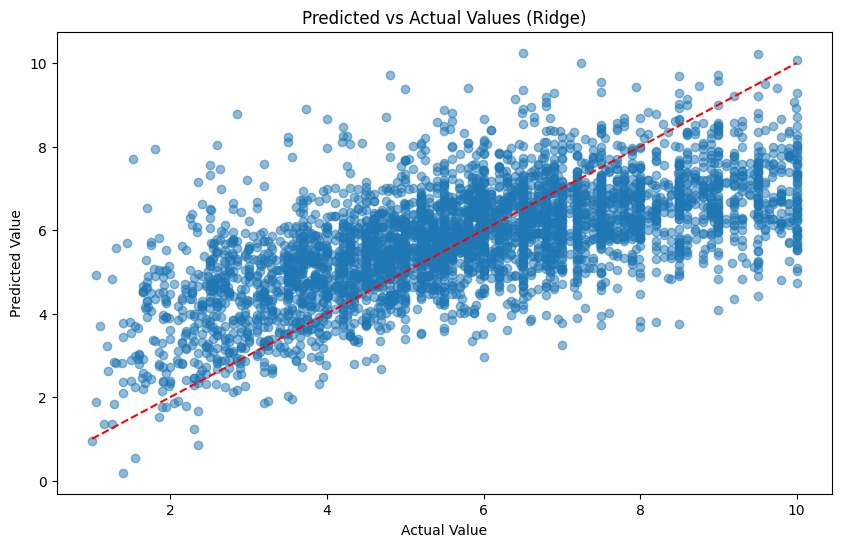

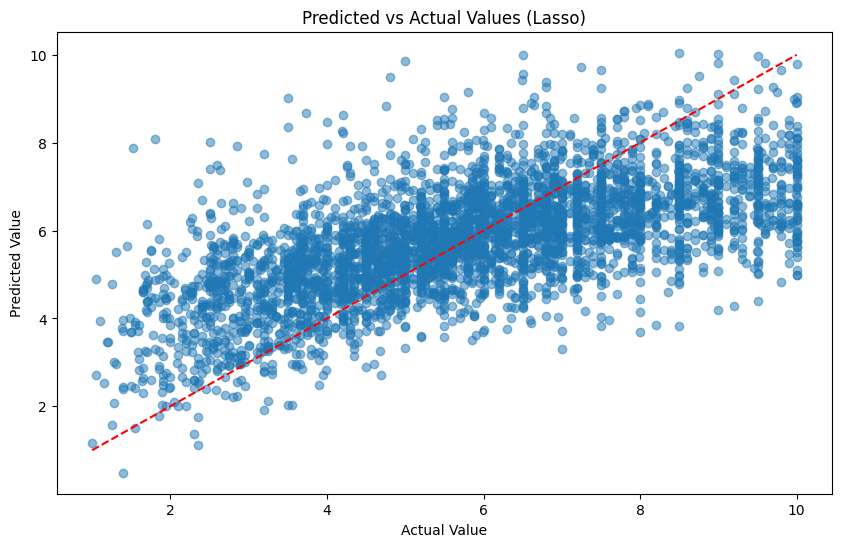

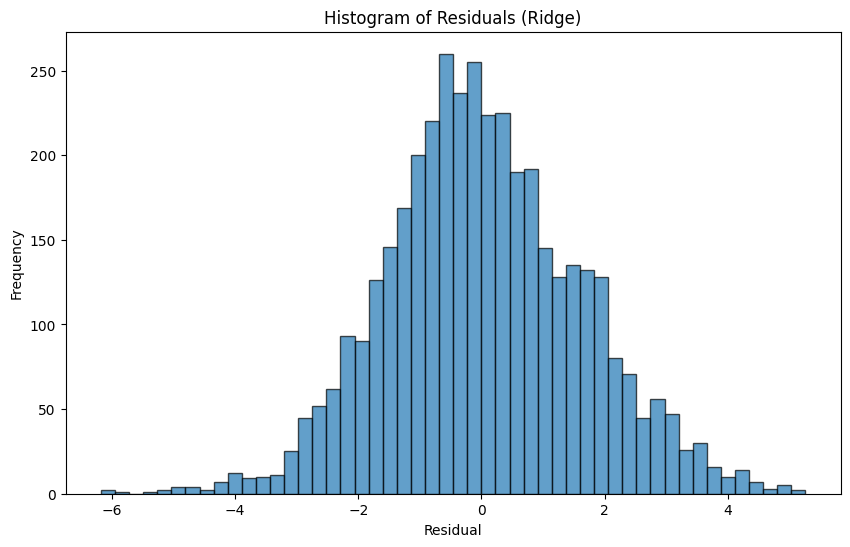

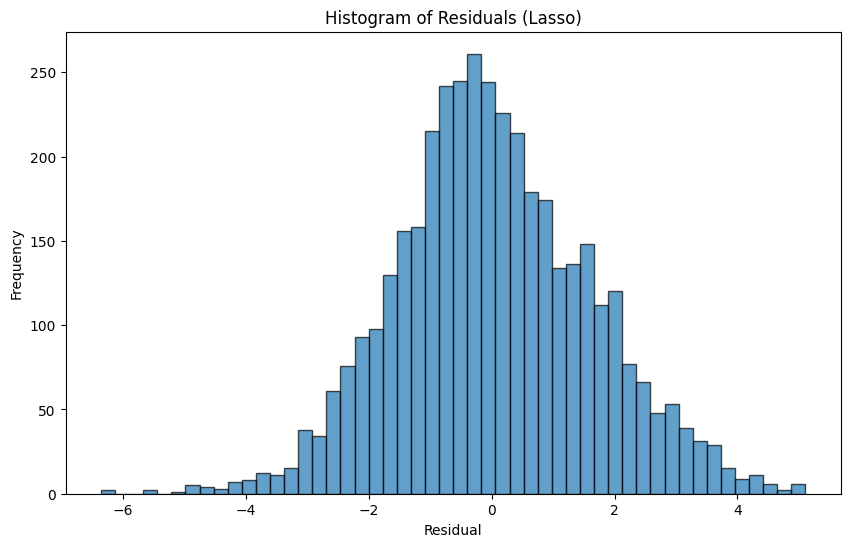

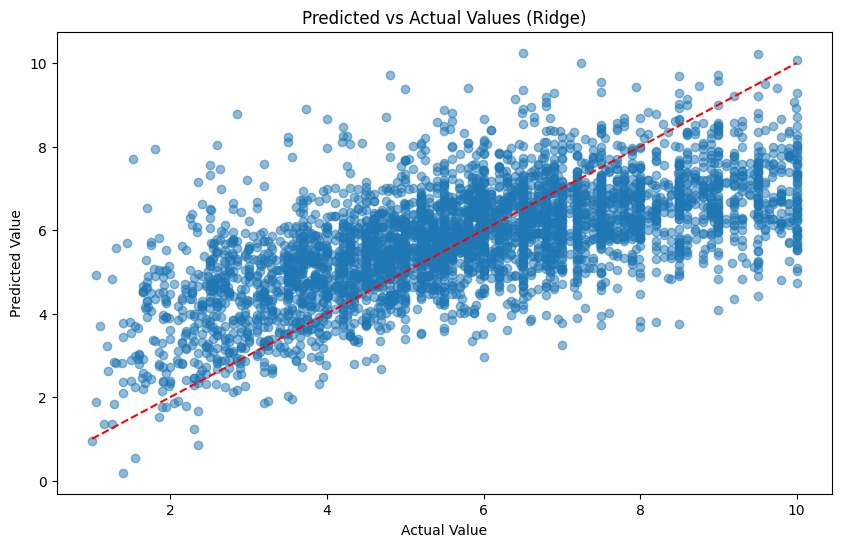

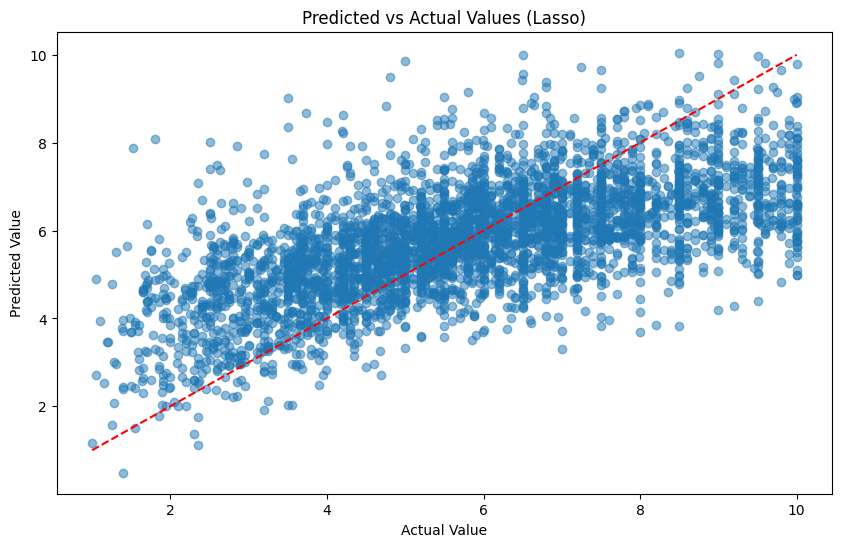

In [ ]:
ridge_best = joblib.load(ridge_model_path)
lasso_best = joblib.load(lasso_model_path)

# Giả sử X_test và y_test đã có (vì user chưa cung cấp)
# Dự đoán giá trị với Ridge và Lasso
ridge_pred = ridge_best.predict(X_test)
lasso_pred = lasso_best.predict(X_test)

# Tính phần dư (Residuals)
ridge_residuals = y_test - ridge_pred
lasso_residuals = y_test - lasso_pred

# Plot Histogram of Residuals for Ridge
plt.figure(figsize=(10, 6))
plt.hist(ridge_residuals, bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals (Ridge)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.savefig("/content/drive/MyDrive/DoAnTotNghiep/ridge_residuals.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot Histogram of Residuals for Lasso
plt.figure(figsize=(10, 6))
plt.hist(lasso_residuals, bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals (Lasso)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.savefig("/content/drive/MyDrive/DoAnTotNghiep/lasso_residuals.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot Predicted vs Actual Values for Ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.title('Predicted vs Actual Values (Ridge)')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.savefig("/content/drive/MyDrive/DoAnTotNghiep/ridge_predictions.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot Predicted vs Actual Values for Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.title('Predicted vs Actual Values (Lasso)')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.savefig("/content/drive/MyDrive/DoAnTotNghiep/lasso_predictions.png", dpi=300, bbox_inches='tight')
plt.show()

# Tóm tắt và Giải thích Mô hình XGBoost
1. Cách hoạt động của mô hình

 + Mô hình XGBoost Regressor được sử dụng để dự đoán biến mục tiêu y_test dựa trên tập dữ liệu huấn luyện X_train, y_train.

 + XGBoost (Extreme Gradient Boosting) là một thuật toán boosting dựa trên cây quyết định, hoạt động bằng cách tạo nhiều cây nhỏ và tổng hợp chúng để cải thiện độ chính xác dự đoán.

2. Giải thích các hyperparameter:

 + objective='reg:squarederror': Sử dụng hàm mất mát MSE (Mean Squared Error) phù hợp cho bài toán hồi quy.

 + random_state=42: Đảm bảo tính tái lập kết quả.

 + colsample_bytree=0.7: Chỉ lấy 70% số đặc trưng để xây dựng mỗi cây, giúp giảm overfitting.

 + gamma=0.1: Điều chỉnh độ phức tạp của cây (tăng gamma giúp cắt tỉa cây mạnh hơn).

 + learning_rate=0.01: Tốc độ học nhỏ giúp mô hình học chậm nhưng ổn định, giảm nguy cơ overfitting.

 + max_depth=7: Giới hạn độ sâu tối đa của cây, cân bằng giữa độ chính xác và overfitting.

 + n_estimators=1000: Số lượng cây trong mô hình, càng lớn thì mô hình càng phức tạp.

 + subsample=0.9: Lấy 90% dữ liệu ngẫu nhiên cho mỗi vòng lặp boosting, giúp giảm overfitting.

3. Lý do chọn XGBoost

 + Hiệu suất cao: XGBoost tối ưu hóa gradient boosting giúp tăng tốc độ huấn luyện và dự đoán nhanh hơn.

 + Chống overfitting tốt: Nhờ các tham số như subsample, colsample_bytree, gamma và learning_rate.

 + Khả năng tổng quát hóa mạnh: Điều chỉnh được mức độ phức tạp của mô hình để tránh học quá sát dữ liệu huấn luyện.

 + Hỗ trợ tuning hyperparameter tốt: Có thể kết hợp với GridSearchCV để tối ưu thêm hiệu suất.

In [ ]:
xgb_model_path = os.path.join(save_dir, "xgb_model.pkl")
# if os.path.exists(xgb_model_path):
#     xgb_model = joblib.load(xgb_model_path)
# else:
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    colsample_bytree=0.7,
    gamma=0.1,
    learning_rate=0.01,
    max_depth=7,
    n_estimators=1000,
    subsample=0.9
)
xgb_model.fit(X_train, y_train)
joblib.dump(xgb_model, xgb_model_path)

xgb_model.fit(X_train, y_train, verbose=True)
y_pred = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {xgb_rmse:.2f}")

RMSE: 1.43
RMSE: 1.43


In [ ]:
xgb_mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {xgb_mape * 100:.2f}%")

MAPE: 22.86%
MAPE: 22.86%


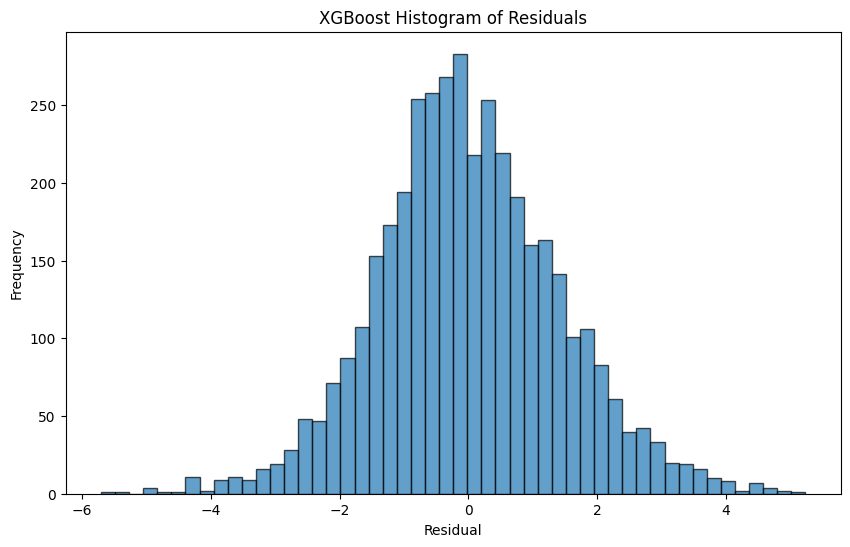

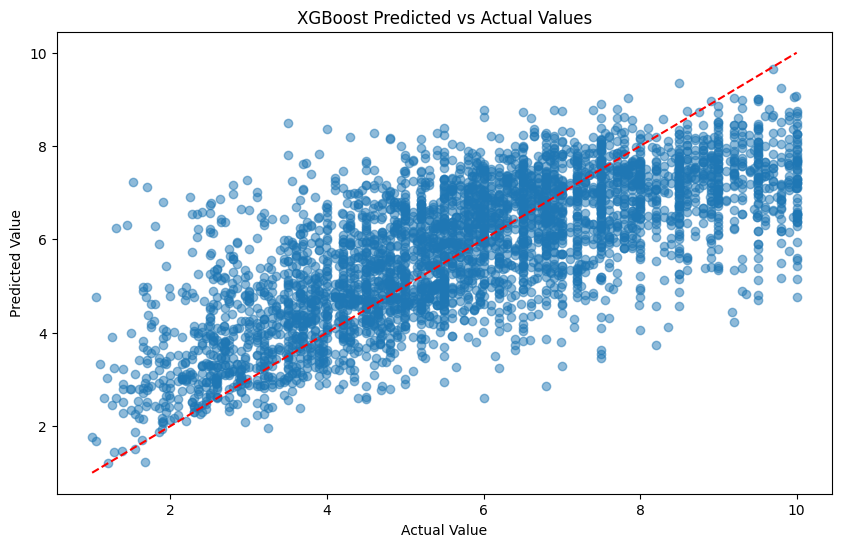

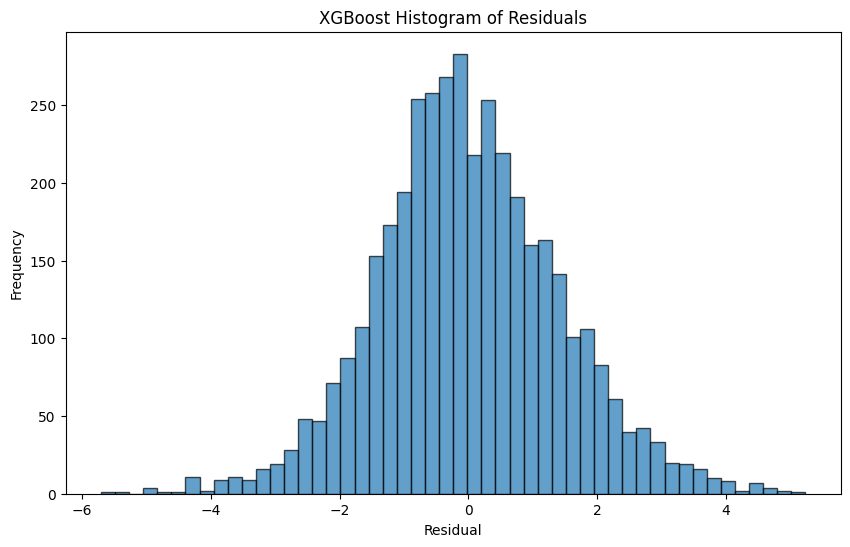

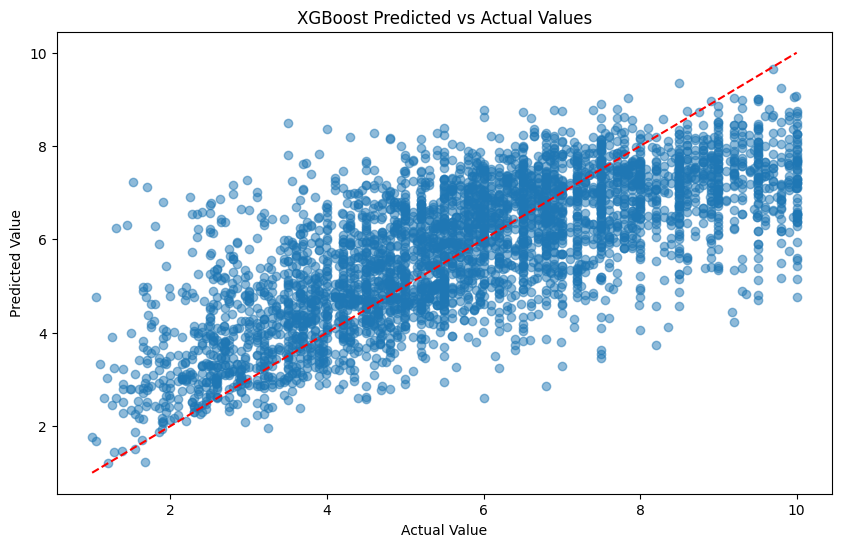

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.title('XGBoost Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.savefig('/content/drive/MyDrive/DoAnTotNghiep/XGBoost_residuals.png', dpi=300, bbox_inches='tight')
plt.show()



# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([1, 10], [1, 10], 'r--')  # Diagonal line for reference
plt.title('XGBoost Predicted vs Actual Values')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.savefig('/content/drive/MyDrive/DoAnTotNghiep/XGBoost_predictions.png', dpi=300, bbox_inches='tight')
plt.show()


# Nhận xét về kết quả biểu đồ:
1. Histogram của phần dư (Residuals Histogram):

+ Phân phối phần dư có dạng xấp xỉ chuẩn, tập trung quanh giá trị 0.
+ Không có dấu hiệu rõ ràng của sự lệch nhiều về một phía, điều này cho thấy mô hình không có xu hướng thiên lệch lớn.
+ Tuy nhiên, vẫn có một số ngoại lệ ở hai phía, có thể là các outliers hoặc mô hình chưa xử lý tốt một số trường hợp đặc biệt.

2. Biểu đồ Giá trị Dự đoán vs. Giá trị Thực tế (Predicted vs. Actual Values):

+ Các điểm dữ liệu phân bố theo xu hướng đường chéo (đường màu đỏ), cho thấy mô hình có khả năng dự đoán tương đối chính xác.
+ Tuy nhiên, có một số điểm nằm xa đường chéo, cho thấy mô hình vẫn có lỗi dự đoán đáng kể trong một số trường hợp.

## Kết luận:
+ Mô hình có độ chính xác tương đối tốt nhưng vẫn có một số sai số.
+ Cần kiểm tra thêm liệu có thể cải thiện mô hình bằng cách điều chỉnh siêu tham số hoặc thử các kỹ thuật xử lý outlier tốt hơn.
+ Có thể kiểm tra thêm các biến đầu vào hoặc thử nghiệm các mô hình khác để xem liệu có thể cải thiện hiệu suất dự đoán không.

In [ ]:
# Các tham số cần tuning
unit_options = [64, 128, 256, 512]
dropout_options = [0.2, 0.3, 0.4]
learning_rates = [0.0005, 0.001]
activation_options = ['relu']

# Lưu kết quả
results = []

# Vòng lặp thử nghiệm
for units in unit_options:
    for dropout in dropout_options:
        for lr in learning_rates:
            for activation_func in activation_options:
                print(f" Training with units={units}, dropout={dropout}, lr={lr}, activation={activation_func}")

                model = Sequential([
                    Dense(units, activation=activation_func, kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
                    Dropout(dropout),
                    Dense(1)
                ])

                optimizer = Adam(learning_rate=lr)
                model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

                lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

                history = model.fit(
                    X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=128,
                    verbose=0,
                    callbacks=[lr_scheduler]
                )

                y_pred = model.predict(X_test)
                rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                results.append((units, dropout, lr, activation_func, rmse))
                print(f" RMSE: {rmse:.4f}\n")

 Training with units=64, dropout=0.2, lr=0.0005, activation=relu
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 RMSE: 1.4903

 Training with units=64, dropout=0.2, lr=0.001, activation=relu
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 RMSE: 1.4915

 Training with units=64, dropout=0.3, lr=0.0005, activation=relu
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 RMSE: 1.4988

 Training with units=64, dropout=0.3, lr=0.001, activation=relu
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 RMSE: 1.4961

 Training with units=64, dropout=0.4, lr=0.0005, activation=relu
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 RMSE: 1.5103

 Training with units=64, dropout=0.4, lr=0.001, activation=relu
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 RMSE: 1.5063

 Training with units=128, dropout=0.2, lr=0.0005, activation=relu
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 RMSE: 1.4787

 Training with units=128, dropout=0.2, lr=0.001, activation=relu
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
 RMSE: 1.4748

 Training with units=128, dropout=

In [ ]:
results_df = pd.DataFrame(results, columns=['Units', 'Dropout', 'Learning Rate', 'Activation', 'RMSE'])

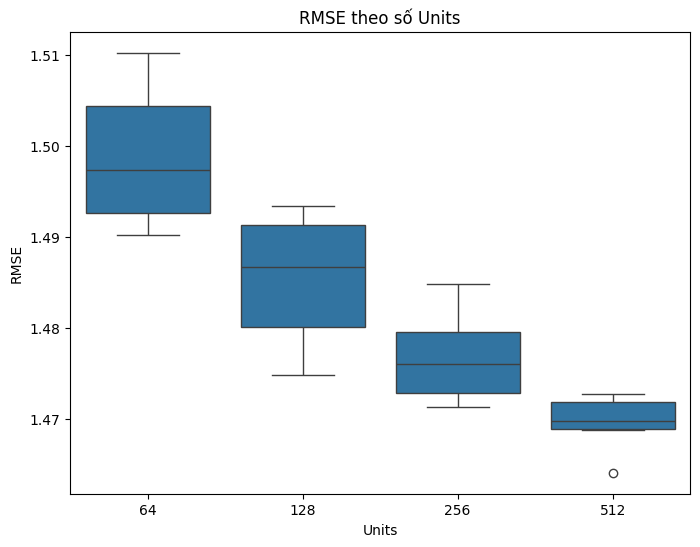

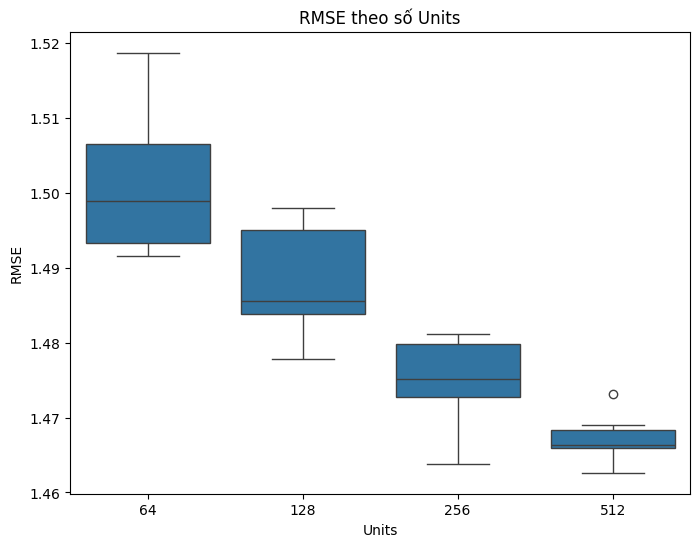

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=results_df, x='Units', y='RMSE')
plt.title('RMSE theo số Units')
plt.savefig('/content/drive/MyDrive/DoAnTotNghiep/rmse_by_units.png', dpi=300)
plt.show()

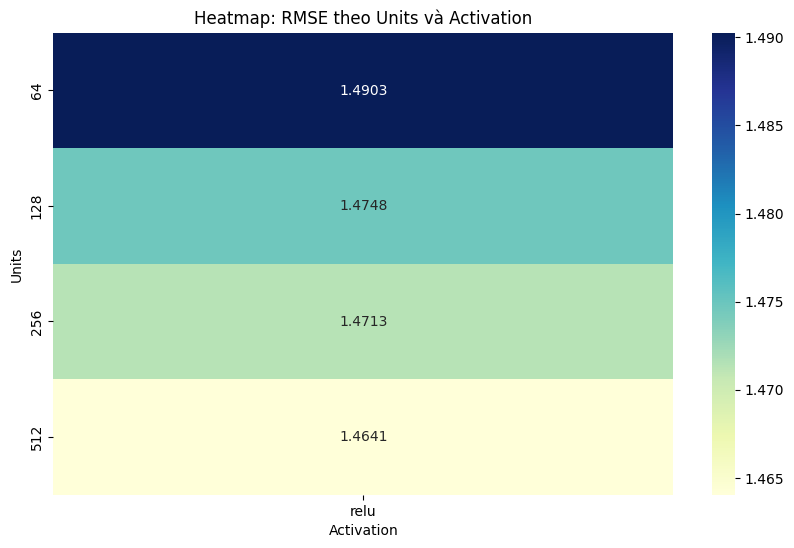

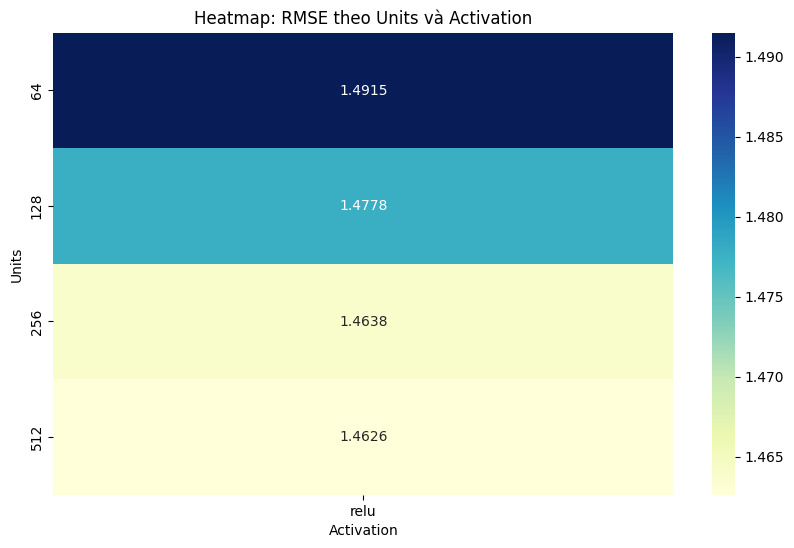

In [ ]:
pivot_table = results_df.pivot_table(index='Units', columns='Activation', values='RMSE', aggfunc='min')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap='YlGnBu')
plt.title('Heatmap: RMSE theo Units và Activation')
plt.savefig('/content/drive/MyDrive/DoAnTotNghiep/heatmap_units_activation.png', dpi=300)
plt.show()

In [ ]:
best_config = [512, 0.2, 0.001, 'relu']

In [ ]:
best_config = min(results, key=lambda x: x[-1])
print(f"🏆 Best config: units={best_config[0]}, dropout={best_config[1]}, lr={best_config[2]}, activation={best_config[3]}")
print(f"👉 Best RMSE: {best_config[-1]:.4f}")

🏆 Best config: units=512, dropout=0.2, lr=0.001, activation=relu
👉 Best RMSE: 1.4641
🏆 Best config: units=512, dropout=0.2, lr=0.001, activation=relu
👉 Best RMSE: 1.4626


In [ ]:
# Huấn luyện lại mô hình tốt nhất
best_model = Sequential([
    Dense(best_config[0], activation=best_config[3], kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    Dropout(best_config[1]),
    Dense(1, activation='relu')

])

best_model.compile(optimizer=Adam(learning_rate=best_config[2]), loss='mse', metrics=['mae'])
best_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128, verbose=1)

# Lưu
best_model.save("/content/drive/MyDrive/DoAnTotNghiep/final_model/best_manual_tuned_ann.h5", include_optimizer=False)

Epoch 1/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 14.0850 - mae: 3.0298 - val_loss: 2.9452 - val_mae: 1.3494
Epoch 2/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7744 - mae: 1.3052 - val_loss: 2.4297 - val_mae: 1.2156
Epoch 3/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4440 - mae: 1.2152 - val_loss: 2.3379 - val_mae: 1.1864
Epoch 4/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4062 - mae: 1.2095 - val_loss: 2.3123 - val_mae: 1.1772
Epoch 5/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3265 - mae: 1.1785 - val_loss: 2.2831 - val_mae: 1.1726
Epoch 6/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3568 - mae: 1.1915 - val_loss: 2.2785 - val_mae: 1.1717
Epoch 7/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3068 - mae: 1.1757 - val_loss: 2.2665 - val_mae: 1.1713
Epoch 8/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3365 - mae: 1.1865 - val_loss: 2.2770 - val_mae: 1.1761
Epoch 9/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

Epoch 1/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 16.6965 - mae: 3.3476 - val_loss: 3.0060 - val_mae: 1.3617
Epoch 2/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8027 - mae: 1.3143 - val_loss: 2.4785 - val_mae: 1.2297
Epoch 3/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4743 - mae: 1.2258 - val_loss: 2.3511 - val_mae: 1.1906
Epoch 4/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4302 - mae: 1.2123 - val_loss: 2.3118 - val_mae: 1.1812
Epoch 5/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3742 - mae: 1.1981 - val_loss: 2.3009 - val_mae: 1.1727
Epoch 6/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3182 - mae: 1.1788 - val_loss: 2.2977 - val_mae: 1.1725
Epoch 7/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3434 - mae: 1.1906 - val_loss: 2.2868 - val_mae: 1.1723
Epoch 8/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3276 - mae: 1.1844 - val_loss: 2.2584 - val_mae: 1.1638
Epoch 9/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

In [ ]:
best_model.save("/content/drive/MyDrive/DoAnTotNghiep/final_model/ann_model.keras")

In [ ]:
# Đường dẫn đến mô hình đã lưu
ann_model_path = '/content/drive/MyDrive/DoAnTotNghiep/final_model/best_manual_tuned_ann.h5'

# Load mô hình và compile lại
if os.path.exists(ann_model_path):
    print("✅ Found model. Loading...")
    model = load_model(ann_model_path, compile=False)
    model.compile(
        optimizer='adam',
        loss=MeanSquaredError(),
        metrics=[MeanAbsoluteError()]
    )

✅ Found model. Loading...
✅ Found model. Loading...


124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Optimized ANN (1 Hidden Layer) RMSE with 128 units: 1.47
MAPE: 22.90%


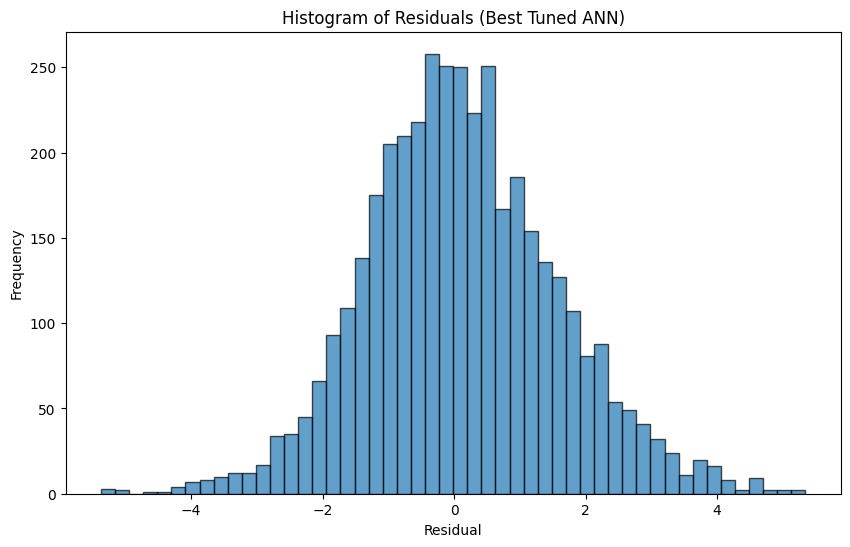

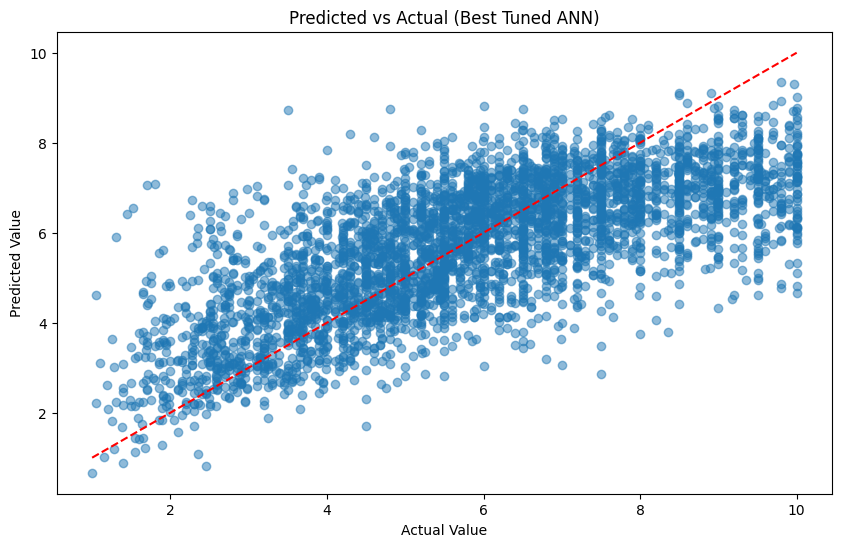

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Optimized ANN (1 Hidden Layer) RMSE with 128 units: 1.47
MAPE: 23.91%


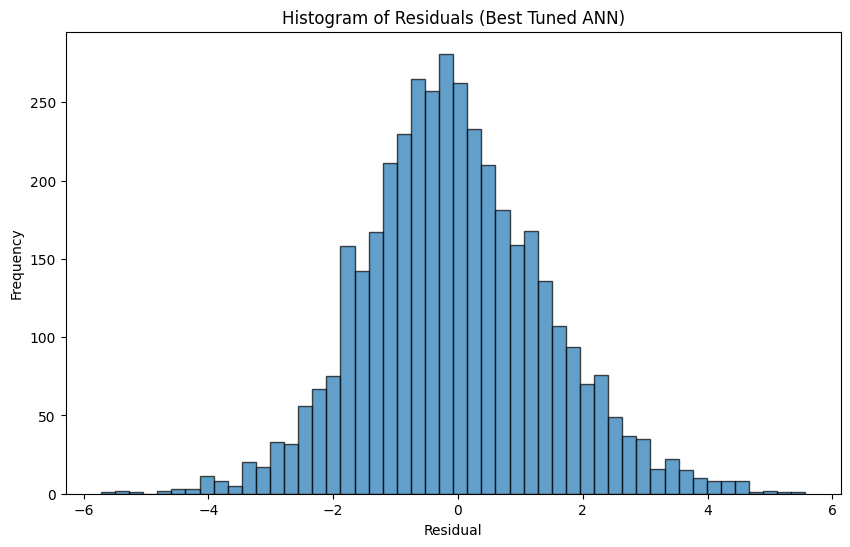

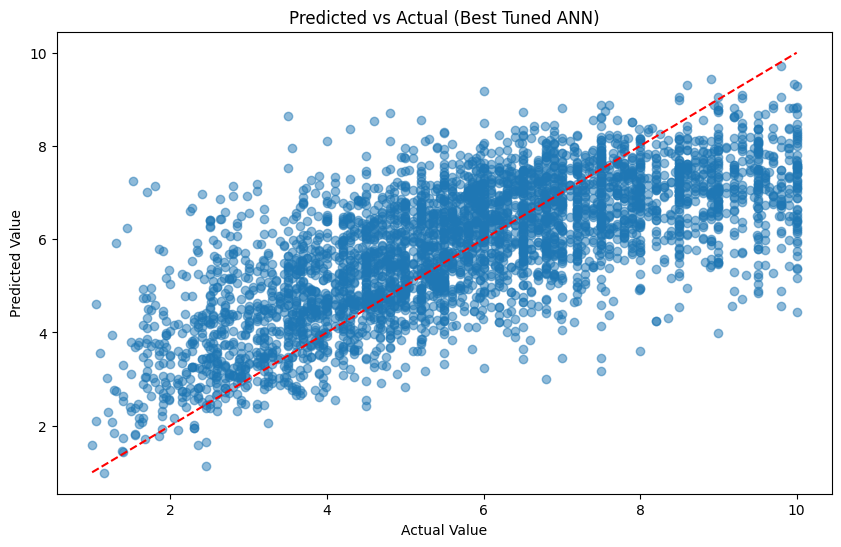

In [ ]:
# Dự đoán
y_pred_ann = model.predict(X_test)
y_pred_ann = y_pred_ann.flatten()

# Tính RMSE
ann_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ann))
print(f"Optimized ANN (1 Hidden Layer) RMSE with 128 units: {ann_rmse:.2f}")

# Tính MAPE
ann_mape = mean_absolute_percentage_error(y_test, y_pred_ann)
print(f"MAPE: {ann_mape * 100:.2f}%")

# Vẽ residuals
residuals_ann = y_test - y_pred_ann
plt.figure(figsize=(10, 6))
plt.hist(residuals_ann, bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals (Best Tuned ANN)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.savefig('/content/drive/MyDrive/DoAnTotNghiep/residuals_ann_best.png', dpi=300, bbox_inches='tight')
plt.show()

# Vẽ biểu đồ Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ann, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Predicted vs Actual (Best Tuned ANN)')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.savefig('/content/drive/MyDrive/DoAnTotNghiep/predictions_ann_best.png', dpi=300, bbox_inches='tight')
plt.show()

# Sau khi huấn luyện với số node khác nhau ở lớp Ẩn, kết luận được:

+ 128 Node ẩn là tối ưu nhất vì có thời gian huấn luyện ngắn và cho ra kết quả gần đúng nhất (RMSE thấp nhất (1.47) trong 6 trường hợp)
+ Nếu tăng số node lên hơn 128 node thì chỉ gây lãng phí tài nguyên nhưng không hỗ trợ tăng sự chính xác.

In [ ]:
print(f"Ridge Regression - MAPE: {ridge_mape *100:.2f}%, RMSE: {ridge_rmse:.2f}")
print("-------------------------------------------------------------------")
print(f"Lasso Regression - MAPE: {lasso_mape*100:.2f}%, RMSE: {lasso_rmse:.2f}")
print("-------------------------------------------------------------------")
print(f"XGBoost Regression - MAPE: {xgb_mape*100:.2f}%, RMSE: {xgb_rmse:.2f}")
print("-------------------------------------------------------------------")
print(f"ANN Regression - MAPE: {ann_mape*100:.2f}%, RMSE: {ann_rmse:.2f}")


Ridge Regression - MAPE: 26.21%, RMSE: 1.59
-------------------------------------------------------------------
Lasso Regression - MAPE: 26.57%, RMSE: 1.60
-------------------------------------------------------------------
XGBoost Regression - MAPE: 22.86%, RMSE: 1.43
-------------------------------------------------------------------
ANN Regression - MAPE: 23.91%, RMSE: 1.47


In [ ]:
feature_names = preprocessor.get_feature_names_out()
final_feature_list = list(feature_names)
print(len(final_feature_list))
print(final_feature_list)

24
['num__Area', 'num__Frontage', 'num__Access Road', 'num__Floors', 'num__Bedrooms', 'num__Bathrooms', 'num__is_major_city', 'num__is_center_district', 'num__Total Room', 'num__Total Room + Floor', 'num__Bedrooms * Area', 'num__Bathrooms * Area', 'num__Area_Floors', 'num__High_Values Real Estate', 'num__AveragePricePerSquare', 'cat__Legal status_Have certificate', 'cat__Legal status_None', 'cat__Legal status_Sale contract', 'cat__Furniture state_Basic', 'cat__Furniture state_Full', 'cat__Furniture state_None', 'cat__region_Central', 'cat__region_North', 'cat__region_South']


In [ ]:
# Lưu danh sách cột đầu vào
with open("/content/drive/MyDrive/DoAnTotNghiep/final_model/final_feature_list.pkl", "wb") as f:
    cloudpickle.dump(final_feature_list, f)

In [ ]:
def evaluate_model(model, X_val, y_val):
    # Dự đoán
    y_pred = model.predict(X_val).flatten()

    # Tính các chỉ số đánh giá
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2 = r2_score(y_val, y_pred)

    print(f"✅ MAE:  {mae:.2f} tỷ VND")
    print(f"✅ RMSE: {rmse:.2f} tỷ VND")
    print(f"✅ R²:   {r2:.4f}")

    # Vẽ biểu đồ
    plt.figure(figsize=(8, 6))
    plt.scatter(y_val, y_pred, color='dodgerblue', edgecolors='k', alpha=0.7)
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label='Đường chẩn đoán y = x')
    plt.xlabel("Giá trị thực tế (tỷ VND)")
    plt.ylabel("Giá trị dự đoán (tỷ VND)")
    plt.title("🎯 So sánh Giá trị Thực tế vs Dự đoán (Tập Val)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ MAE:  1.16 tỷ VND
✅ RMSE: 1.48 tỷ VND
✅ R²:   0.4616


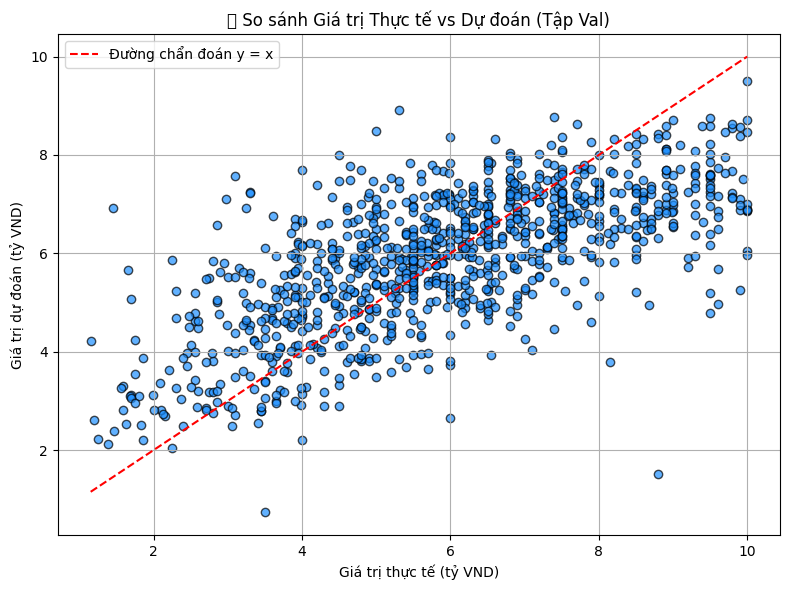

In [ ]:
evaluate_model(model, X_val, y_val)

✅ MAE:  1.11 tỷ VND
✅ RMSE: 1.42 tỷ VND
✅ R²:   0.5023


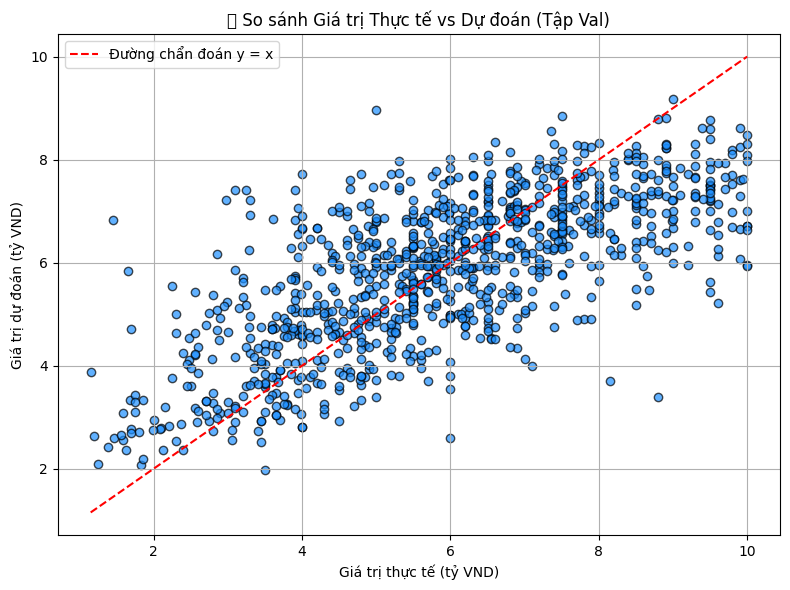

In [ ]:
evaluate_model(xgb_model, X_val, y_val)

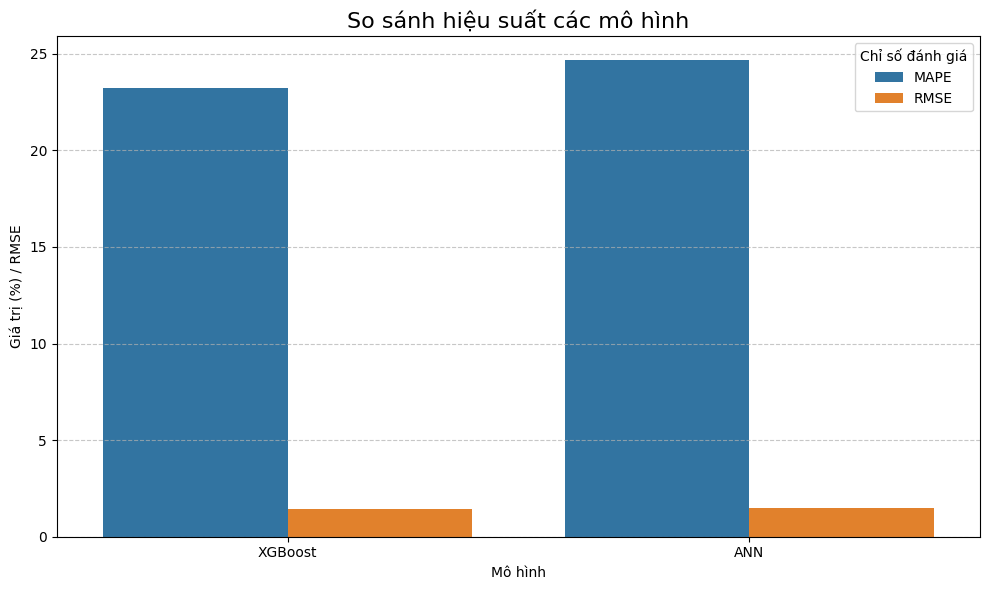

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
metrics = {
    'XGBoost': {'MAPE': 23.25, 'RMSE': 1.42},
    'ANN': {'MAPE': 24.69, 'RMSE': 1.49}
}

# Hàm vẽ biểu đồ
def plot_model_comparison(metrics_dict, title="So sánh hiệu suất các mô hình"):
    df = pd.DataFrame(metrics_dict).T.reset_index().rename(columns={'index': 'Model'})
    df_melted = pd.melt(df, id_vars='Model', var_name='Metric', value_name='Value')

    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_melted, x='Model', y='Value', hue='Metric')
    plt.title(title, fontsize=16)
    plt.ylabel("Giá trị (%) / RMSE")
    plt.xlabel("Mô hình")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Chỉ số đánh giá')
    plt.tight_layout()
    plt.show()

# Gọi hàm vẽ
plot_model_comparison(metrics)

In [ ]:
import re
import unicodedata

# Các danh sách hỗ trợ
province_mapping = {
    'TPHCM': 'Hồ Chí Minh', 'TpHCM': 'Hồ Chí Minh', 'TP. HCM': 'Hồ Chí Minh',
    'TP Hồ Chí Minh': 'Hồ Chí Minh', 'Hồ Chí Mính': 'Hồ Chí Minh', 'Hồ Chí Minh.': 'Hồ Chí Minh',
    'Hà Nội': 'Hà Nội', 'HN': 'Hà Nội', 'Hà Nội.': 'Hà Nội',
    'Đà Nẵng.': 'Đà Nẵng', 'Đà Nẵng': 'Đà Nẵng', 'Cần Thơ.': 'Cần Thơ'
}

major_cities = {
    'Hồ Chí Minh': ['Quận 1', 'Quận 3', 'Quận 5', 'Quận 10', 'Bình Thạnh', 'Phú Nhuận', 'Quận 7'],
    'Hà Nội': ['Ba Đình', 'Hoàn Kiếm', 'Đống Đa', 'Hai Bà Trưng', 'Cầu Giấy', 'Thanh Xuân', 'Tây Hồ']
}

north = ['Hà Nội', 'Hải Phòng', 'Quảng Ninh', 'Bắc Ninh', 'Hưng Yên']
central = ['Đà Nẵng', 'Thừa Thiên Huế', 'Quảng Nam']
south = ['Hồ Chí Minh', 'Cần Thơ', 'Bình Dương', 'Đồng Nai']

def get_region(province):
    if province in north:
        return 'North'
    elif province in central:
        return 'Central'
    elif province in south:
        return 'South'
    return 'Other'

def prepare_input(form_input):
    address = form_input['address']
    province = address.split(',')[-1].strip()
    province = province_mapping.get(province, province)

    # Thành phố lớn và trung tâm
    is_major_city = int(province in major_cities)
    is_center = 0
    if is_major_city:
        for d in major_cities[province]:
            if d in address:
                is_center = 1
                break

    # Region
    region = get_region(province)

    # Các thông tin cơ bản
    area = form_input['area']
    floors = form_input['floors']
    bedrooms = form_input['bedrooms']
    bathrooms = form_input['bathrooms']

    # Optional: cho phép nhập AveragePricePerSquare, nếu không có gán mặc định
    avg_price = form_input.get('AveragePricePerSquare', 0)

    # Tạo DataFrame
    df = pd.DataFrame([{
        'Area': area,
        'Frontage': form_input['frontage'],
        'Access Road': form_input['access_road'],
        'Floors': floors,
        'Bedrooms': bedrooms,
        'Bathrooms': bathrooms,
        'Legal status': form_input['legal_status'],
        'Furniture state': form_input['furniture_state'],
        'is_major_city': is_major_city,
        'is_center_district': is_center,
        'region': region,
        'Total Room': bedrooms + bathrooms,
        'Total Room + Floor': bedrooms + bathrooms + floors,
        'Bedrooms * Area': bedrooms * area,
        'Bathrooms * Area': bathrooms * area,
        'Area_Floors': area * floors,
        'High_Values Real Estate': is_major_city * is_center,
        'AveragePricePerSquare': avg_price
    }])

    print("\n📌 ✅ Dữ liệu gốc chưa scale:")
    print(df.T)

    # Chạy qua pipeline
    X_ready = preprocessor.transform(df)

    # Chuyển thành DataFrame để dễ đọc log
    X_ready_df = pd.DataFrame(X_ready, columns=final_feature_list)

    print("\n📏 ✅ Dữ liệu sau khi scale:")
    print(X_ready_df.T)

    return X_ready_df

In [ ]:
test_input = {
    'address': 'Bình Thạnh, Hồ Chí Minh',
    'area': 50,
    'floors': 2,
    'bedrooms': 2,
    'bathrooms': 2,
    'frontage': 4.0,
    'access_road': 5.0,
    'legal_status': 'Sổ hồng',
    'furniture_state': 'Đầy đủ',
    'AveragePricePerSquare': 0.1
}

preprocessor = joblib.load("/content/drive/MyDrive/DoAnTotNghiep/final_model/preprocessor.pkl")
final_feature_list = joblib.load("/content/drive/MyDrive/DoAnTotNghiep/final_model/final_feature_list.pkl")
X_input = prepare_input(test_input)
prediction = model.predict(X_input)[0][0]
print(f"\n✅ Kết quả dự đoán: {prediction:.2f} tỷ VND")



📌 ✅ Dữ liệu gốc chưa scale:
                               0
Area                          50
Frontage                     4.0
Access Road                  5.0
Floors                         2
Bedrooms                       2
Bathrooms                      2
Legal status             Sổ hồng
Furniture state           Đầy đủ
is_major_city                  1
is_center_district             1
region                     South
Total Room                     4
Total Room + Floor             6
Bedrooms * Area              100
Bathrooms * Area             100
Area_Floors                  100
High_Values Real Estate        1
AveragePricePerSquare        0.1

📏 ✅ Dữ liệu sau khi scale:
                                           0
num__Area                          -0.207721
num__Frontage                      -0.939157
num__Access Road                   -0.262621
num__Floors                        -1.259895
num__Bedrooms                      -1.735300
num__Bathrooms                     -1.519830
n

In [ ]:
from random import randint
guess = randint(0, len(X_test))
sample = X_test[guess].reshape(1, -1)
prediction = model.predict(sample)
sample_df = pd.DataFrame(sample, columns=final_feature_list)
xgb_pred = xgb_model.predict(sample)
print("✅ Dự đoán giá trị bởi XGBoost:", round(xgb_pred[0],2))
print("✅ Dự đoán giá trị bởi ANN:", round(prediction[0][0],2))
print("✅ giá trị thật:", y_test.iloc[guess])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
✅ Dự đoán giá trị bởi XGBoost: 7.21
✅ Dự đoán giá trị bởi ANN: 7.23
✅ giá trị thật: 8.4


In [ ]:
df_result = pd.DataFrame({
    'y_true': y_val,
    'y_pred': model.predict(X_val).flatten()
})

# Chia theo khoảng
bins = [0, 3, 7, 15]
labels = ['< 3 tỷ', '3 - 7 tỷ', '> 7 tỷ']
df_result['price_range'] = pd.cut(df_result['y_true'], bins=bins, labels=labels)

# Tính MAE hoặc MAPE theo từng khoảng
grouped = df_result.groupby('price_range').apply(
    lambda x: pd.Series({
        'MAE': mean_absolute_error(x['y_true'], x['y_pred']),
        'MAPE': np.mean(np.abs((x['y_true'] - x['y_pred']) / x['y_true'])) * 100
    })
).reset_index()

print(grouped)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
  price_range       MAE       MAPE
0      < 3 tỷ  1.567912  73.804852
1    3 - 7 tỷ  0.957600  20.115856
2      > 7 tỷ  1.479369  17.145487


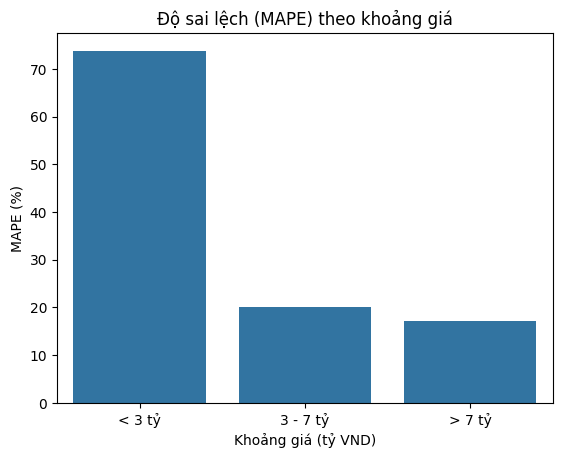

In [ ]:
sns.barplot(data=grouped, x='price_range', y='MAPE')
plt.title('Độ sai lệch (MAPE) theo khoảng giá')
plt.ylabel('MAPE (%)')
plt.xlabel('Khoảng giá (tỷ VND)')
plt.show()

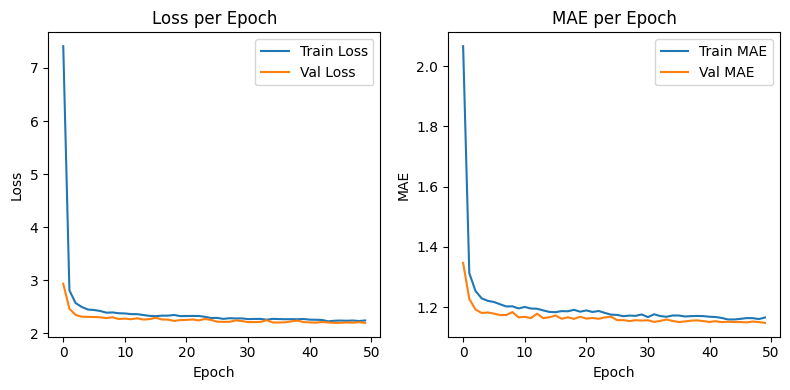

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Loss
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # MAE
    if 'mae' in history.history:
        plt.subplot(1, 3, 2)
        plt.plot(history.history['mae'], label='Train MAE')
        plt.plot(history.history['val_mae'], label='Val MAE')
        plt.title('MAE per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('MAE')
        plt.legend()

    # RMSE (nếu bạn custom metric RMSE)
    if 'rmse' in history.history:
        plt.subplot(1, 3, 3)
        plt.plot(history.history['rmse'], label='Train RMSE')
        plt.plot(history.history['val_rmse'], label='Val RMSE')
        plt.title('RMSE per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('RMSE')
        plt.legend()

    plt.tight_layout()
    plt.show()
plot_training_history(history)